In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import random

In [2]:
from astropy.io import fits

---------------------------------------------------------
### Check the  10 years Lat-data... version 23
---------------------------------------------------------

In [3]:
gll_psc_v23 = fits.open('gll_psc_v23.fit')
gll_psc_v23.info()

Filename: gll_psc_v23.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    435   5788R x 74C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 10E, 20E, 10E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1519R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     73   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     40   11R x 1C   [D]   
  7  GTI           1 BinTableHDU     37   57987R x 2C   [D, D]   


In [4]:
gll_psc_v23_list0 =  gll_psc_v23[0]
print (gll_psc_v23_list0)
print ('data type 0th col: ', type (gll_psc_v23_list0))

gll_psc_v23_list1 = gll_psc_v23[1]
print ('data shape 1st col: ', gll_psc_v23_list1.data.shape) # no of sources changed from version 22 

data type 0th col:  <class 'astropy.io.fits.hdu.image.PrimaryHDU'>
data shape 1st col:  (5788,)


In [5]:
# rand_num = np.random.randint(1, 500)
# print ('check example data: ', gll_psc_v23_list1.data[rand_num])

In [5]:
print ('columns descriptions: ', gll_psc_v23_list1.columns)

columns descriptions:  ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format 

In [6]:
print ('only column names list:', gll_psc_v23_list1.columns.names)
print ('number of cols: ', len(gll_psc_v23_list1.columns.names))

only column names list: ['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng', 'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num', 'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_Index', 'Unc_PLEC_Index', 'PLEC_Expfactor', 'Unc_PLEC_Expfactor', 'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred', 'Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band', 'Sqrt_TS_Band', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak', 'Unc_Flux_Peak', 'Time_Peak', 'Peak_Interval', 'Flux_History', 'Unc_Flux_History', 'Sqrt_TS_History', 'ASSOC_FGL', 'ASSOC_

In [7]:
gll_psc_v23_list1_data = gll_psc_v23_list1.data

## prepare the columns for dataframe (LogParabola)

v23LP_Name = gll_psc_v23_list1_data['Source_Name']
v23LP_RA = gll_psc_v23_list1_data['RAJ2000']
v23LP_DEJ = gll_psc_v23_list1_data['DEJ2000']
v23LP_GLON = gll_psc_v23_list1_data['GLON']
v23LP_GLAT = gll_psc_v23_list1_data['GLAT']
v23LP_PEn = gll_psc_v23_list1_data['Pivot_Energy']
v23LP_EnF1000 = gll_psc_v23_list1_data['Energy_Flux100']
v23LP_spectype = gll_psc_v23_list1_data['SpectrumType']
v23LP_FDensity = gll_psc_v23_list1_data['LP_Flux_Density']
v23LP_Index = gll_psc_v23_list1_data['LP_Index']
v23LP_Beta = gll_psc_v23_list1_data['LP_beta']
v23LP_Scurve = gll_psc_v23_list1_data['LP_SigCurv']
v23LP_Npred = gll_psc_v23_list1_data['Npred']
v23LP_Class1 = gll_psc_v23_list1_data['CLASS1']

In [29]:
FGL4_DR2Name = gll_psc_v23_list1_data['Source_Name']
FGL4_DR2DateRelease = gll_psc_v23_list1_data['DataRelease']
FGL4_DR2RA = gll_psc_v23_list1_data['RAJ2000']
FGL4_DR2DEJ = gll_psc_v23_list1_data['DEJ2000']
FGL4_GLON = gll_psc_v23_list1_data['GLON']
FGL4_GLAT = gll_psc_v23_list1_data['GLAT']
FGL4_68SMajor = gll_psc_v23_list1_data['Conf_68_SemiMajor']
FGL4_68SMinor = gll_psc_v23_list1_data['Conf_68_SemiMinor']
FGL4_68PosAng = gll_psc_v23_list1_data['Conf_68_PosAng']
FGL4_95SMajor = gll_psc_v23_list1_data['Conf_95_SemiMajor']
FGL4_95SMinor = gll_psc_v23_list1_data['Conf_95_SemiMinor']
FGL4_95PosAng = gll_psc_v23_list1_data['Conf_95_PosAng']
FGL4_ROIN = gll_psc_v23_list1_data['ROI_num']
FGL4_SigAVG = gll_psc_v23_list1_data['Signif_Avg']
FGL4_PivEn = gll_psc_v23_list1_data['Pivot_Energy']
FGL4_Fl1000 = gll_psc_v23_list1_data['Flux1000']
FGL4_UncF1000 = gll_psc_v23_list1_data['Unc_Flux1000']
FGL4_EnF100 = gll_psc_v23_list1_data['Energy_Flux100']
FGL4_UncEnF100 = gll_psc_v23_list1_data['Unc_Energy_Flux100']
FGL4_SpecType = gll_psc_v23_list1_data['SpectrumType']
FGL4_PLFDensity = gll_psc_v23_list1_data['PL_Flux_Density']
FGL4_UncPLFDensity = gll_psc_v23_list1_data['Unc_PL_Flux_Density']
FGL4_PLIndex = gll_psc_v23_list1_data['PL_Index']
FGL4_UncPLIndex = gll_psc_v23_list1_data['Unc_PL_Index']
FGL4_LPFDensity = gll_psc_v23_list1_data['LP_Flux_Density']
FGL4_UncLPFDensity = gll_psc_v23_list1_data['Unc_LP_Flux_Density']
FGL4_LPIndex = gll_psc_v23_list1_data['LP_Index']
FGL4_UncLPIndex = gll_psc_v23_list1_data['Unc_LP_Index']
FGL4_LPBeta = gll_psc_v23_list1_data['LP_beta']
FGL4_UncLPBeta = gll_psc_v23_list1_data['Unc_LP_beta']
FGL4_LPsigCurv = gll_psc_v23_list1_data['LP_SigCurv']
FGL4_PLECFDensity = gll_psc_v23_list1_data['PLEC_Flux_Density']
FGL4_UncPLECFDensity = gll_psc_v23_list1_data['Unc_PLEC_Flux_Density']
FGL4_PLECIndex = gll_psc_v23_list1_data['PLEC_Index']
FGL4_UncPLECIndex = gll_psc_v23_list1_data['Unc_PLEC_Index']

FGL4_PLECExpfac = gll_psc_v23_list1_data['PLEC_Expfactor']
FGL4_UncPLECExpfac = gll_psc_v23_list1_data['Unc_PLEC_Expfactor']

FGL4_PLECExpIndex = gll_psc_v23_list1_data['PLEC_Exp_Index']
FGL4_UncPLECExpIndex = gll_psc_v23_list1_data['Unc_PLEC_Exp_Index']
FGL4_PLECsigCurv = gll_psc_v23_list1_data['PLEC_SigCurv']

FGL4_Npred = gll_psc_v23_list1_data['Npred']
FGL4_Flux_Band = gll_psc_v23_list1_data['Flux_Band']

FGL4_UncFlux_Band = gll_psc_v23_list1_data['Unc_Flux_Band']

FGL4_nuFnu_Band = gll_psc_v23_list1_data['nuFnu_Band']

FGL4_sqrtTS_Band = gll_psc_v23_list1_data['Sqrt_TS_Band']

FGL4_Var_index = gll_psc_v23_list1_data['Variability_Index']

FGL4_Frac_var = gll_psc_v23_list1_data['Frac_Variability']
FGL4_Unc_Frac_var = gll_psc_v23_list1_data['Unc_Frac_Variability']

FGL4_sigpeak = gll_psc_v23_list1_data['Signif_Peak']
FGL4_fluxpeak = gll_psc_v23_list1_data['Flux_Peak']
FGL4_uncfluxpeak = gll_psc_v23_list1_data['Unc_Flux_Peak']
FGL4_timepeak = gll_psc_v23_list1_data['Time_Peak']
FGL4_peak_interval = gll_psc_v23_list1_data['Peak_Interval']

FGL4_Flux_History = gll_psc_v23_list1_data['Flux_History']
FGL4_UncFlux_History = gll_psc_v23_list1_data['Unc_Flux_History']

FGL4_SqrtTs_History = gll_psc_v23_list1_data['Sqrt_TS_History']

FGL4_Asoc_FGL = gll_psc_v23_list1_data['ASSOC_FGL']

FGL4_class1 = gll_psc_v23_list1_data['CLASS1']
FGL4_class2 = gll_psc_v23_list1_data['CLASS2']

In [30]:
FGL4_DR2df = pd.DataFrame(data = FGL4_DR2Name, columns = ['Source_Name'])

In [31]:
FGL4_DR2df.head(3)

,Source_Name
0,4FGL J0000.3-7355
1,4FGL J0000.5+0743
2,4FGL J0001.2+4741


In [34]:
print ('all dataframe shape: ', FGL4_DR2df.shape)

list_of_colsFGL4_DR2 = [FGL4_DR2DateRelease, FGL4_DR2RA, FGL4_DR2DEJ, FGL4_GLON, FGL4_GLAT, 
                       FGL4_68SMajor, FGL4_68SMinor, FGL4_68PosAng, FGL4_95SMajor, FGL4_95SMinor, 
                       FGL4_95PosAng, FGL4_ROIN, FGL4_SigAVG, FGL4_PivEn, FGL4_Fl1000, FGL4_UncF1000, 
                       FGL4_EnF100, FGL4_UncEnF100, FGL4_SpecType, FGL4_PLFDensity, FGL4_UncPLFDensity,
                       FGL4_PLIndex, FGL4_UncPLIndex, FGL4_LPFDensity, FGL4_UncLPFDensity, FGL4_LPIndex, 
                       FGL4_UncLPIndex, FGL4_LPBeta, FGL4_UncLPBeta, FGL4_LPsigCurv, FGL4_PLECFDensity, 
                       FGL4_UncPLECFDensity, FGL4_PLECIndex, FGL4_UncPLECIndex, FGL4_PLECExpfac, 
                       FGL4_UncPLECExpfac, FGL4_PLECExpIndex, FGL4_UncPLECExpIndex, FGL4_PLECsigCurv, 
                       FGL4_Npred, FGL4_class1, FGL4_class2]

list_of_colsFGL4_DR2_strings = ['DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 
                                'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng', 
                                'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num', 
                                'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 
                                'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 
                                'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 
                                'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 
                                'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_Index', 'Unc_PLEC_Index', 
                                'PLEC_Expfactor', 'Unc_PLEC_Expfactor', 'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 
                                'PLEC_SigCurv', 'Npred', 'CLASS1', 'CLASS2']


for f in range(len(list_of_colsFGL4_DR2)):
    FGL4_DR2df[list_of_colsFGL4_DR2_strings[f]] = list_of_colsFGL4_DR2[f]


print (len(list_of_colsFGL4_DR2), len(list_of_colsFGL4_DR2_strings))

all dataframe shape:  (5788, 41)
42 42


In [36]:
FGL4_DR2df.head(3)
print ('shape now: ', FGL4_DR2df.shape)

shape now:  (5788, 43)


In [37]:
FGL4_DR2df.to_csv('FGL4_DR2.csv', sep='\t')

In [162]:
v23LP_df = pd.DataFrame(data = v23LP_Name, columns=['N'])

In [30]:
## check the first few rows
v23LP_df.head(3)

,N
0,4FGL J0000.3-7355
1,4FGL J0000.5+0743
2,4FGL J0001.2+4741


In [163]:
list_of_cols_v23 = [v23LP_GLAT, v23LP_GLON, v23LP_RA, v23LP_RA, v23LP_PEn, v23LP_EnF1000, 
                    v23LP_spectype, v23LP_FDensity, v23LP_Index, v23LP_Beta, v23LP_Scurve, 
                    v23LP_Npred, v23LP_Class1]
list_of_cols_strings_v23 = ['GLAT', 'GLON', 'RA', 'DEC', 'Piv_En', 'En_flux_100', 
                            'Spec_Type', 'LP_f_density', 'LP_index', 'LP_beta', 'LP_sig_curv', 'Npred', 'Class1']

for y in range(len(list_of_cols_v23)):
    v23LP_df[list_of_cols_strings_v23[y]] = list_of_cols_v23[y]

In [164]:
v23LP_df.head(3)
print ('dataframe shape: ', v23LP_df.shape)

dataframe shape:  (5788, 14)


In [165]:
##### check fr null values 
print ('null values in particular col: ', v23LP_df['LP_f_density'].isnull().sum())
print ('null values in entire dataframe: ', v23LP_df.isnull().values.any())
print ('total number of null values: ', v23LP_df.isnull().sum().sum())

null values in particular col:  6
null values in entire dataframe:  True
total number of null values:  18


In [167]:
### check the rows that have nan values 
is_nan = v23LP_df.isnull()
row_has_nan = is_nan.any(axis=1)
row_with_nan = v23LP_df[row_has_nan]

print ('rows with nan: \n',  row_with_nan)

rows with nan: 
                        N       GLAT        GLON          RA         DEC  \
905   4FGL J0429.0-0006  -31.261189  194.949234   67.254898   67.254898   
1808  4FGL J0850.4-2558   11.386075  250.172607  132.618393  132.618393   
2537  4FGL J1202.9-5717    4.959503  296.396118  180.744202  180.744202   
2581  4FGL J1209.9-5923    3.054528  297.662476  182.482895  182.482895   
5173  4FGL J2048.4-2517  -36.010777   20.160492  312.104889  312.104889   
5236  4FGL J2106.9+2455  -14.933372   71.750999  316.741699  316.741699   

           Piv_En   En_flux_100          Spec_Type  LP_f_density  LP_index  \
905    737.818726  1.778346e-12  PowerLaw                    NaN       NaN   
1808  1799.499512  1.446630e-12  PowerLaw                    NaN       NaN   
2537  2528.030273  2.082596e-12  PowerLaw                    NaN       NaN   
2581  2007.472046  3.267276e-12  PowerLaw                    NaN       NaN   
5173  2595.241943  1.013089e-12  PowerLaw                    NaN   

In [168]:
#### drop rows that have the nan values 
v23LP_df.dropna(how='any', inplace=True)

In [169]:
print ('shape after dropping: ', v23LP_df.shape)

shape after dropping:  (5782, 14)


In [170]:
#### check if it indeed worked : 

print ('null values in particular col: ', v23LP_df['LP_f_density'].isnull().sum())
print ('null values in entire dataframe: ', v23LP_df.isnull().values.any())
print ('total number of null values: ', v23LP_df.isnull().sum().sum())

#### great !! 

null values in particular col:  0
null values in entire dataframe:  False
total number of null values:  0


#### Class 1 types (Table 7 4FGL paper): 
| Designator | Description |
| --- | --- |
| PSR | pulsar, identified by pulsation | 
| --  | pulsar, but no pulses seen in LAT |
| PWN | pulsar wind nebulae |
| SNR | supernova remnant |
| SPP | SNR/PWN |
| GLC | Globular Cluster | 
| SFR | Star forming region |
| HMB | High Mass Binary |
| LMB | Low Mass Binary |
| BIN | Binary |
| NOV | Nova |
| BLL | BL Lac type Blazar |
| FSRQ | FSRQ type Blazar |
| RDG | Radio Galaxy |
| AGN | Non-blazar Active Galaxy |
| SSRQ | Steep Spectrum Radio Quasar |
| CSS | Compact Steep Spectrum Radio Source |
| BCU | Blazar Candidate of Uncertain Type |
| NLSY-1 | Narrow Line Seyfert 1 |
| SEY | Seyfert Galaxy |
| SBG | Starburst Galaxy |
| GAL | Normal Galaxy |
| UNK | Unknown | 

##### Log Parabola Parametrization and Parameters Used 

$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \text{log} (E/E_0)}$

$\alpha : $ LP Index.  

$\beta : $ LP Beta, No significantly negative $\beta$ was found (spectrum curved upwards).  

$ K : $ LP Flux density, Unit : $\text{cm}^{-2}\, \text {MeV}^{-1}\, \text{s}^{-1}$. Differential flux at Pivot Energy in LogParabola fit. 

$ E_0 : $ Pivot energy, MeV.   

Another quantity not used in the parametrization but should be useful for catalog generation is -- Energy Flux100. This is the energy flux from 100 MeV to 100 GeV obtained by spectral fitting. Unit is $\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$.  

For the generation of synthetic catalogue, the above mentioned parameters are drawn from Gaussians whose mean and variance are determined from the corresponding parameters' distribution in of all AGN-tagged sources. For selection of AGN sources from 4FGL catalogue, list of identified AGNs- $\texttt{fsrq, bll, bcu, rdg, nlsy1, agn, sey, ssrq}$ are chosen.     

In [171]:
# create a sub-dataframe from the main where only classified AGNs are present 

# first check the unique elements of column Class1
Class1_unique = v23LP_df.Class1.unique()
print ('check unique elements in Class1: ', Class1_unique)

Class1_AGNs = ['fsrq ', 'FSRQ ', 'bll  ', 'BLL  ', 'bcu  ', 'BCU  ', 'rdg  ', 'RDG  ', 'nlsy1', 'NLSY1', 
               'agn  ', 'AGN  ', 'sey  ', 'ssrq '] # beware of capital and small letters 
# based on  these categories, create a dataframe which is unique for only AGNs

v23LP_df_AGNs = v23LP_df[v23LP_df['Class1'].isin(Class1_AGNs)]

check unique elements in Class1:  ['     ' 'bcu  ' 'bll  ' 'fsrq ' 'unk  ' 'spp  ' 'PSR  ' 'rdg  ' 'agn  '
 'FSRQ ' 'glc  ' 'snr  ' 'gal  ' 'sbg  ' 'BLL  ' 'GAL  ' 'sfr  ' 'bin  '
 'SNR  ' 'HMB  ' 'RDG  ' 'nlsy1' 'psr  ' 'LMB  ' 'css  ' 'AGN  ' 'PWN  '
 'pwn  ' 'BCU  ' 'hmb  ' 'ssrq ' 'NLSY1' 'lmb  ' 'SFR  ' 'BIN  ' 'sey  '
 'NOV  ']


In [172]:
print ('Data frame shape: ', v23LP_df.shape)
print ('Only AGN Dataframe shape: ', v23LP_df_AGNs.shape)
print ('cross check the unique elements in Class column and length: ', v23LP_df_AGNs.Class1.unique(), 
      len(v23LP_df_AGNs.Class1.unique()))

Data frame shape:  (5782, 14)
Only AGN Dataframe shape:  (3502, 14)
cross check the unique elements in Class column and length:  ['bcu  ' 'bll  ' 'fsrq ' 'rdg  ' 'agn  ' 'FSRQ ' 'BLL  ' 'RDG  ' 'nlsy1'
 'AGN  ' 'BCU  ' 'ssrq ' 'NLSY1' 'sey  '] 14


In [40]:
v23LP_df_AGNs.head(5)

,N,GLAT,GLON,RA,DEC,Piv_En,En_flux_100,Spec_Type,LP_f_density,LP_index,LP_beta,LP_sig_curv,Npred,Class1
2,4FGL J0001.2+4741,-14.338059,114.250198,0.3126,0.3126,2514.941650,1.406756e-12,PowerLaw,1.893531e-14,2.233714,-0.008457,0.083895,222.475037,bcu
3,4FGL J0001.2-0747,-67.305008,89.032722,0.3151,0.3151,1612.614136,9.171432e-12,PowerLaw,3.583349e-13,2.071893,0.048770,1.625189,1084.599609,bll
4,4FGL J0001.5+2113,-40.167652,107.649353,0.3815,0.3815,355.784424,2.614211e-11,LogParabola,4.532746e-11,2.548151,0.158776,7.324853,5038.069336,fsrq
5,4FGL J0001.6-4156,-72.028549,334.226349,0.4165,0.4165,4009.383789,3.912511e-12,PowerLaw,2.347405e-14,1.667587,0.069755,1.480155,295.798431,bcu
6,4FGL J0002.1-6728,-48.963467,310.084930,0.5378,0.5378,3689.189453,2.888272e-12,PowerLaw,2.371141e-14,1.677874,0.163729,2.544940,291.010864,bcu


In [ ]:
### check for nan or null values in dataframe

In [173]:
#### check the minimum and max value of some cols
print ('max of LP alpha: ', v23LP_df_AGNs['LP_index'].max())
print ('min of LP alpha: ', v23LP_df_AGNs['LP_index'].min())

print ('max of LP beta: ', v23LP_df_AGNs['LP_beta'].max())
print ('min of LP beta: ', v23LP_df_AGNs['LP_beta'].min())

print ('max of LP Flux density (cm^-2 MeV^-1 s^-1): ', v23LP_df_AGNs['LP_f_density'].max())
print ('min of LP Flux density (cm^-2 MeV^-1 s^-1): ', v23LP_df_AGNs['LP_f_density'].min())

print ('max of PiV Energy (MeV): ', v23LP_df_AGNs['Piv_En'].max())
print ('min of PiV Energy (MeV): ', v23LP_df_AGNs['Piv_En'].min())

print (np.isfinite(v23LP_df_AGNs['LP_beta']).all())

max of LP alpha:  3.7085202
min of LP alpha:  -0.083803646
max of LP beta:  0.9999999
min of LP beta:  -0.1694731
max of LP Flux density (cm^-2 MeV^-1 s^-1):  3.874912e-09
min of LP Flux density (cm^-2 MeV^-1 s^-1):  2.4213178e-16
max of PiV Energy (MeV):  24191.277
min of PiV Energy (MeV):  149.21089
True


#### Distribution of Parameters for Selected AGNs

number of bins:  59


Text(0.5, 0, 'Pivot Energy $E_0$ [MeV]')

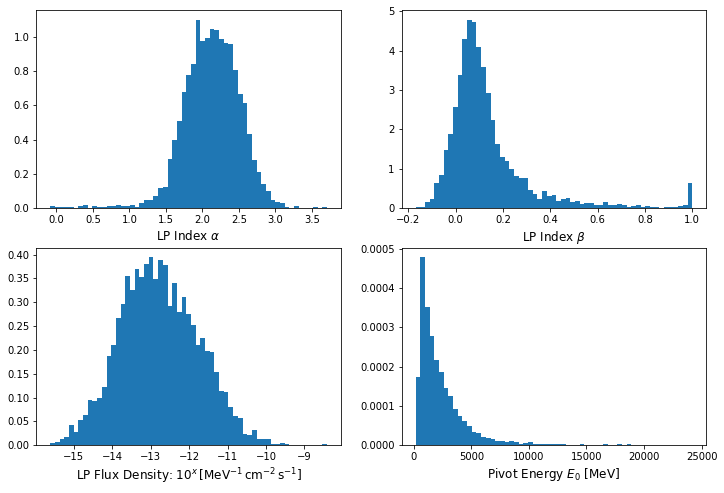

In [174]:
LP_df_AGNs_bins = int(np.sqrt(v23LP_df_AGNs.shape[0]))
print ('number of bins: ', LP_df_AGNs_bins)


fig = plt.figure(figsize=(12, 8))

fig.add_subplot(221)
plt.hist(v23LP_df_AGNs['LP_index'], density=True, bins=LP_df_AGNs_bins)
plt.xlabel(r'LP Index $\alpha$', fontsize=12)

fig.add_subplot(222)
plt.hist(v23LP_df_AGNs['LP_beta'], density=True, bins=LP_df_AGNs_bins)
plt.xlabel(r'LP Index $\beta$', fontsize=12)

fig.add_subplot(223)
plt.hist(np.log10(v23LP_df_AGNs['LP_f_density']), bins=LP_df_AGNs_bins, density=True)
#np.log10(v23LP_df_AGNs['LP_f_density']).plot.hist(density=True)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', fontsize=12)

fig.add_subplot(224)
plt.hist(v23LP_df_AGNs['Piv_En'], bins=LP_df_AGNs_bins, density=True)
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

#### LP Parameter Generation 

##### Method 1: 
Draw the parameters $(\alpha , \beta , E_0, K)$ from Gaussian whose mean and variance are determined from the respective parameteres' distribution of all AGN tagged sources in 4FGL.  

Later: Not all of the parameters follow a gaussian distribution ! 

##### Method 2: 
A single gaussian is fitted to the selected parameter distribution and the corresponding mean and variance are used when the resulting gaussian distribution obtained from fitted parameters looks sensible.  

In [175]:
LP_index_mean = v23LP_df_AGNs['LP_index'].mean()
LP_index_var = v23LP_df_AGNs['LP_index'].var()

LP_beta_mean = v23LP_df_AGNs['LP_beta'].mean()
LP_beta_var = v23LP_df_AGNs['LP_beta'].var()

LP_Fdensity_mean = np.mean(np.log10(v23LP_df_AGNs['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var = np.var(np.log10(v23LP_df_AGNs['LP_f_density']))

LP_PEn_mean = np.mean(v23LP_df_AGNs['Piv_En']) 
LP_PEn_std = np.std(v23LP_df_AGNs['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean)
print ('check LP_index_var: ', LP_index_var)

print ('check LP_F_Density mean: ', LP_Fdensity_mean)
print ('check LP_F_Density var: ', LP_Fdensity_var)

print ('check LP_PEn mean: ', LP_PEn_mean)
print ('check LP_PEn std: ', LP_PEn_std)

print ('check LP_beta_mean: ', LP_beta_mean)
print ('check LP_beta_var: ', LP_beta_var)

check LP_index_mean:  2.1294296
check LP_index_var:  0.14252175
check LP_F_Density mean:  -12.773007
check LP_F_Density var:  1.0357815
check LP_PEn mean:  2415.633
check LP_PEn std:  2373.0857
check LP_beta_mean:  0.13406754
check LP_beta_var:  0.032014545


In [176]:
from scipy.stats import norm

LP_index_fit_mu, LP_index_fit_std = norm.fit(v23LP_df_AGNs['LP_index'])
print ('from fitting check LP_index_mean, std: ', LP_index_fit_mu, LP_index_fit_std)

LP_beta_fit_mu, LP_beta_fit_std = norm.fit(v23LP_df_AGNs['LP_beta']) 
# definitely LP_beta doesn't follow normal distribution from figure above
print ('from fitting check LP_beta_mean, std: ', LP_beta_fit_mu, LP_beta_fit_std)

LP_Fdensity_fit_mu, LP_Fdensity_fit_std = norm.fit(np.log10(v23LP_df_AGNs['LP_f_density']))
print ('from fitting check LP_beta_mean, std: ', LP_Fdensity_fit_mu, LP_Fdensity_fit_std)

from fitting check LP_index_mean, std:  2.1294296 0.37746662
from fitting check LP_beta_mean, std:  0.13406754 0.17890054
from fitting check LP_beta_mean, std:  -12.773007 1.0177335


In [179]:
#### Once we obtain the mean and variance no we create the normal distribution of the same parameters..
### newer version (v23), for legacy (8yrs, v22) follow the same steps
### for alpha, log10(flux density) normal distribution
### for beta gumbel and for Pivot En lognormal dist (checked and tested)


LP_df_mockCat_bins = 13500
LPIndex_mock_dist = np.sqrt(LP_index_var) * np.random.randn(LP_df_mockCat_bins) + LP_index_mean
LPIndex_mock_dist1 = np.random.normal(LP_index_mean, np.sqrt(LP_index_var), LP_df_mockCat_bins)
LPIndex_mock_dist2 = np.random.normal(LP_index_fit_mu, LP_index_fit_std, LP_df_mockCat_bins)

LPBeta_mock_dist = np.sqrt(LP_beta_var) * np.random.randn(LP_df_mockCat_bins) + LP_beta_mean
LPBeta_mock_dist1 = np.random.normal(LP_beta_mean, np.sqrt(LP_beta_var), LP_df_mockCat_bins)
LPBeta_mock_dist2 = np.random.gumbel(LP_beta_mean-0.077, np.sqrt(LP_beta_var)-0.1, size=LP_df_mockCat_bins) 
# best for beta
LPBeta_mock_dist3 = np.random.normal(LP_beta_fit_mu, LP_beta_fit_std, LP_df_mockCat_bins)

LPFDensity_mock_dist = 10**(np.sqrt(LP_Fdensity_var) * np.random.randn(LP_df_mockCat_bins) + LP_Fdensity_mean)
LPFDensity_mock_dist1 = 10**(np.random.normal(LP_Fdensity_mean, np.sqrt(LP_Fdensity_var), LP_df_mockCat_bins))
LPFDensity_mock_dist2 = 10**(np.random.normal(LP_Fdensity_fit_mu, LP_Fdensity_fit_std, LP_df_mockCat_bins)) 


from scipy.stats import expon, lognorm

logshape1, logloc1, logscale1 = lognorm.fit(v23LP_df_AGNs['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1, logloc1, logscale1, np.log(logscale1))

LPPivEn_mock_dist3 = np.random.lognormal(np.log(logscale1), logshape1, LP_df_mockCat_bins)
LPPivEn_mock_dist3f = LPPivEn_mock_dist3[(LPPivEn_mock_dist3<26000.)]

check fit shape, loc and scale, log(scale):  0.7975224702595898 -6.125106823871893 1736.7101505514295 7.459747884471078


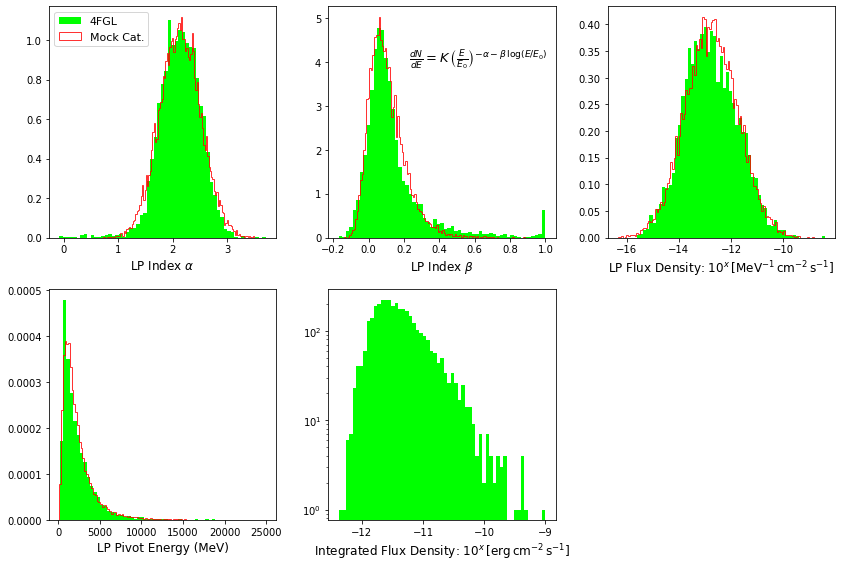

In [184]:
### compare the distribution 

fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v23LP_df_AGNs['LP_index'], density=True, bins=LP_df_AGNs_bins, color='lime', label='4FGL')
plt.hist(LPIndex_mock_dist2, bins=int(np.sqrt(LP_df_mockCat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v23LP_df_AGNs['LP_beta'], density=True, bins=LP_df_AGNs_bins, color='lime')
plt.hist(LPBeta_mock_dist2, bins=int(np.sqrt(LP_df_mockCat_bins)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

plt.text(0.23, 4, 
         r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
        fontsize=13)
plt.xlabel(r'LP Index $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v23LP_df_AGNs['LP_f_density']), density=True, bins=LP_df_AGNs_bins, color='lime')
plt.hist(np.log10(LPFDensity_mock_dist1), density=True, bins=int(np.sqrt(LP_df_mockCat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v23LP_df_AGNs['Piv_En'], density=True, bins=LP_df_AGNs_bins, color='lime')
plt.hist(LPPivEn_mock_dist3f, density=True, bins=int(np.sqrt(LP_df_mockCat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
xticksPEn = ['20e3', ]
plt.xlabel(r'LP Pivot Energy (MeV)', fontsize=12)


plt.subplot(2, 3, 5)

plt.hist(np.log10(v23LP_df_AGNs['En_flux_100']), density=False, bins=LP_df_AGNs_bins, color='lime')

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.tight_layout()

plt.savefig('Mock_AGN_4FGLV23_Params.png', dpi=150)

-----------------
#### Distribution of Parameters for Selected Pulsars 
-----------------

##### Pulsar Parametrization and Parameters Used:  

Subexponentially cutoff power-law for all significantly curved pulsars are used. Below is the parametrization--

$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

$E_0$ : Pivot Energy is same as in LogParabola parametrization. Unit MeV. 

$K$: Power-law with Exponential cut-off (PLEC) flux density: Unit : $\text{cm}^{-2}\, \text {MeV}^{-1}\, \text{s}^{-1}$. Differential flux at Pivot Energy in PLSuperExpCutoff fit

$\Gamma : $ Low energy spectral slope. PLEC Index. 

$a: $ exponential factor in $\text{MeV} ^{-b}$. PLEC expfactor. From 4FGL paper -- no significantly negative $a$ (spectrum curved upwards) was found. 

$b: $ Exponential index: PLEC Exp Index. 

The other important parameter would be PLEC sig curve (just like LP sig curve), which signifies the likelihood of the curved representation over the likelihood of simple power law. $TS_{\text{curv}} = 2\, \text{log} \left(\frac{L_{\text{curv}} } {L_{\text{PL}}} \right)$. Curved representation is used in the global model if $TS_{\text{curv}} > 9\, (3\sigma)$ significance.    

For selection of Pulsars we will use tag $\texttt{psr}$. 

In [46]:
### select pulsars based on the tags 

v23LP_Name = gll_psc_v23_list1_data['Source_Name']
v23LP_RA = gll_psc_v23_list1_data['RAJ2000']
v23LP_DEJ = gll_psc_v23_list1_data['DEJ2000']
v23LP_GLON = gll_psc_v23_list1_data['GLON']
v23LP_GLAT = gll_psc_v23_list1_data['GLAT']
v23LP_PEn = gll_psc_v23_list1_data['Pivot_Energy']
v23LP_F1000 = gll_psc_v23_list1_data['Flux1000']
v23LP_EnF1000 = gll_psc_v23_list1_data['Energy_Flux100']
v23LP_spectype = gll_psc_v23_list1_data['SpectrumType']
v23PLEC_Index = gll_psc_v23_list1_data['PLEC_Index']
v23PLEC_ExpIndex = gll_psc_v23_list1_data['PLEC_Exp_Index'] 
v23PLEC_FDensity = gll_psc_v23_list1_data['PLEC_Flux_Density']
v23PLEC_ExpFactor = gll_psc_v23_list1_data['PLEC_Expfactor']
v23PLEC_SigCurv = gll_psc_v23_list1_data['PLEC_SigCurv']
v23LP_Npred = gll_psc_v23_list1_data['Npred']
v23LP_Class1 = gll_psc_v23_list1_data['CLASS1'] 


v23PLEC_df =pd.DataFrame(data = v23LP_Name, columns=['N'])

In [47]:
list_of_cols_v23_plec = [v23LP_GLAT, v23LP_GLON, v23LP_RA, v23LP_DEJ, v23LP_PEn, v23LP_F1000, v23LP_EnF1000, 
                         v23LP_spectype, v23PLEC_FDensity, v23PLEC_Index, v23PLEC_ExpIndex, 
                         v23PLEC_ExpFactor, v23PLEC_SigCurv, v23LP_Npred, v23LP_Class1]
list_of_cols_strings_v23_plec = ['GLAT', 'GLON', 'RA', 'DEC', 'Piv_En', 'Flux1000', 'En_flux_100', 
                                 'Spec_Type', 'PLEC_f_density', 'PLEC_Index', 'PLEC_ExpIndex', 
                                 'PLEC_ExpFac', 'PLEC_Sigma', 'Npred', 'Class1']

for pl in range(len(list_of_cols_v23_plec)):
    v23PLEC_df[list_of_cols_strings_v23_plec[pl]] = list_of_cols_v23_plec[pl]
    
    
print ('check shape: ', v23PLEC_df.shape)

check shape:  (5788, 16)


In [48]:
Class1_PSRs = ['PSR  ', 'psr  ']

v23PLEC_df_PSR = v23PLEC_df[v23PLEC_df['Class1'].isin(Class1_PSRs)]

print ('Data frame shape: ', v23PLEC_df.shape)
print ('Only AGN Dataframe shape: ', v23PLEC_df_PSR.shape)
print ('cross check the unique elements in Class column and length: ', v23PLEC_df_PSR.Class1.unique(), 
      len(v23PLEC_df_PSR.Class1.unique()) )

print ('\n')

print ('check for value counts: ', v23PLEC_df_PSR.Class1.value_counts())

Data frame shape:  (5788, 16)
Only AGN Dataframe shape:  (259, 16)
cross check the unique elements in Class column and length:  ['PSR  ' 'psr  '] 2


check for value counts:  PSR      235
psr       24
Name: Class1, dtype: int64


In [29]:
v23PLEC_df_PSR.head(5)

,N,GLAT,GLON,RA,DEC,Piv_En,Flux1000,En_flux_100,Spec_Type,PLEC_f_density,PLEC_Index,PLEC_ExpIndex,PLEC_ExpFac,PLEC_Sigma,Npred,Class1
11,4FGL J0002.8+6217,-0.051036,117.320412,0.7201,62.290501,1361.693359,2.545386e-09,1.772054e-11,PLSuperExpCutoff,1.931218e-12,1.115103,0.666667,0.013249,10.815266,2774.397949,PSR
29,4FGL J0007.0+7303,10.461680,119.662628,1.7680,73.051201,1472.989990,6.662928e-08,4.297058e-10,PLSuperExpCutoff,3.477769e-11,1.068375,0.565947,0.020463,70.456589,45060.996094,PSR
89,4FGL J0023.4+0920,-52.896538,111.420189,5.8513,9.347500,972.792542,1.219634e-09,7.552931e-12,PLSuperExpCutoff,1.757445e-12,0.843402,0.666667,0.015050,7.900842,1158.647583,PSR
113,4FGL J0030.4+0451,-57.612598,113.134041,7.6107,4.859200,929.791748,1.004220e-08,5.950211e-11,PLSuperExpCutoff,1.464887e-11,0.791467,0.666667,0.014427,32.292423,8179.500000,PSR
127,4FGL J0034.3-0534,-68.073448,111.503700,8.5961,-5.580900,732.139954,2.708463e-09,2.070850e-11,PLSuperExpCutoff,6.814532e-12,1.497607,0.666667,0.008063,11.285559,3160.619873,PSR


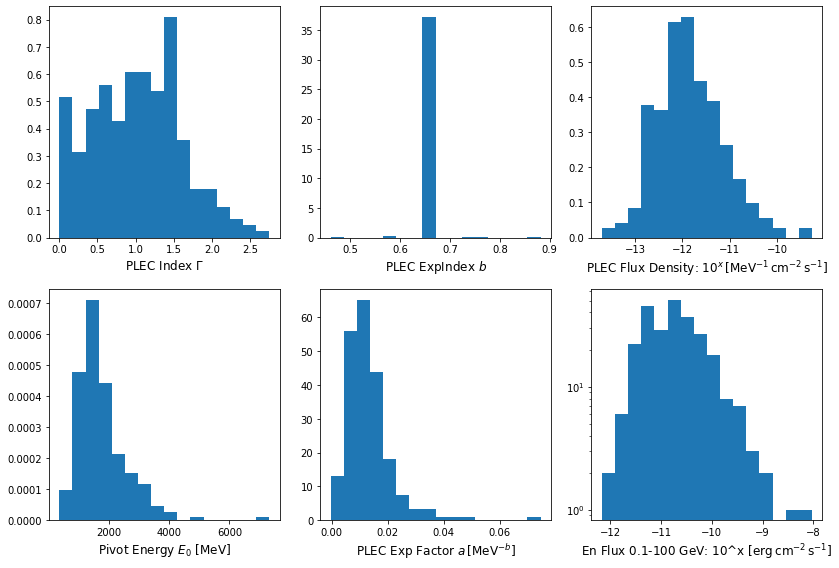

In [49]:
PLEC_df_bins = int(np.sqrt(len(v23PLEC_df_PSR)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v23PLEC_df_PSR['PLEC_Index'], density=True, bins=PLEC_df_bins)
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=12)

fig.add_subplot(232)
plt.hist(v23PLEC_df_PSR['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins)
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v23PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True)
#np.log10(v23LP_df_AGNs['LP_f_density']).plot.hist(density=True)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', 
           fontsize=12)

fig.add_subplot(234)
plt.hist(v23PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True)
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(v23PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True)
plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=12)

fig.add_subplot(236)
plt.hist(np.log10(v23PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False)
plt.xlabel(r'En Flux 0.1-100 GeV: 10^x $[\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
          fontsize=12)
plt.yscale('log')
plt.tight_layout()

In [50]:
PLEC_a_mean = v23PLEC_df_PSR['PLEC_ExpFac'].mean()
PLEC_a_std  = v23PLEC_df_PSR['PLEC_ExpFac'].std()

PLEC_b_mean = v23PLEC_df_PSR['PLEC_ExpIndex'].mean()
PLEC_b_std  = v23PLEC_df_PSR['PLEC_ExpIndex'].std()

PLEC_PEn_mean = v23PLEC_df_PSR['Piv_En'].mean()
PLEC_PEn_std  = v23PLEC_df_PSR['Piv_En'].std()

PLEC_index_mean = v23PLEC_df_PSR['PLEC_Index'].mean()
PLEC_index_std  = v23PLEC_df_PSR['PLEC_Index'].std()

PLEC_FDensity_mean = np.mean(np.log10(v23PLEC_df_PSR['PLEC_f_density']))
PLEC_FDensity_std = np.std(np.log10(v23PLEC_df_PSR['PLEC_f_density']))


print ('check PLEC_a_mean: ', PLEC_a_mean)
print ('check PLEC_a_std: ', PLEC_a_std)

print ('check PLEC_b_mean: ', PLEC_b_mean)
print ('check PLEC_b_std: ', PLEC_b_std)

print ('check PLEC_PEn_mean: ', PLEC_PEn_mean)
print ('check PLEC_PEn_std: ', PLEC_PEn_std)

print ('check PLEC_FDensity_mean: ', PLEC_FDensity_mean)
print ('check PLEC_FDensity_std: ', PLEC_FDensity_std)

print ('\n')


print ('check max min index : ', v23PLEC_df_PSR['PLEC_Index'].max(), v23PLEC_df_PSR['PLEC_Index'].min())
print ('check max min PLEC_a : ', v23PLEC_df_PSR['PLEC_ExpFac'].max(), v23PLEC_df_PSR['PLEC_ExpFac'].min())
print ('check max min PLEC_b : ', v23PLEC_df_PSR['PLEC_ExpIndex'].max(), v23PLEC_df_PSR['PLEC_ExpIndex'].min())
print ('check max min PLEC_FD : ', v23PLEC_df_PSR['PLEC_f_density'].max(), v23PLEC_df_PSR['PLEC_f_density'].min())
print ('check max min PLEC PEn : ', v23PLEC_df_PSR['Piv_En'].max(), v23PLEC_df_PSR['Piv_En'].min())

check PLEC_a_mean:  0.012924179
check PLEC_a_std:  0.008259578
check PLEC_b_mean:  0.6666273
check PLEC_b_std:  0.021880504
check PLEC_PEn_mean:  1772.3217
check PLEC_PEn_std:  821.3024
check PLEC_FDensity_mean:  -11.836016
check PLEC_FDensity_std:  0.71963763


check max min index :  2.7519224 1.7910324e-07
check max min PLEC_a :  0.07463113 -0.0003238589
check max min PLEC_b :  0.8816206 0.46023634
check max min PLEC_FD :  5.418067e-10 1.9994304e-14
check max min PLEC PEn :  7319.0034 360.87827


In [51]:
PLEC_df_mock_cat_bins = 800

seed1=33
np.random.seed(seed1)

PLECIndex_mock_dist1 = np.random.normal(PLEC_index_mean, PLEC_index_std, PLEC_df_mock_cat_bins)
### index minimum value is 0, so we select array elements based on condition 
# print (PLECIndex_mock_dist1.shape)
PLECIndex_mock_distf = PLECIndex_mock_dist1[np.where((PLECIndex_mock_dist1>0.) & (PLECIndex_mock_dist1<2.7))]
print (PLECIndex_mock_distf.shape)

PLECFden_mock_dist1  = 10**(np.random.normal(PLEC_FDensity_mean, PLEC_FDensity_std, PLEC_df_mock_cat_bins))

PLECb_mock_dist1     = np.random.normal(PLEC_b_mean, PLEC_b_std, PLEC_df_mock_cat_bins)


#### try as before lognorm distribution 

logshapePL_PEn, loglocPL_PEn, logscalePL_PEn = lognorm.fit(v23PLEC_df_PSR['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale) Pivot E: ', logshapePL_PEn, loglocPL_PEn, 
       logscalePL_PEn, np.log(logscalePL_PEn))

PLECPivEn_mock_dist3 = np.random.lognormal(np.log(logscalePL_PEn), logshapePL_PEn, PLEC_df_mock_cat_bins)
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56, color='navy')

# try again lognorm for parameter a

logshapePL_Exp_a, loglocPL_Exp_a, logscalePL_Exp_a = lognorm.fit(v23PLEC_df_PSR['PLEC_ExpFac'], loc=0.02)
print ('check fit shape, loc and scale, log(scale) Exp a:  ', logshapePL_Exp_a, loglocPL_Exp_a, 
       logscalePL_Exp_a, np.log(logscalePL_Exp_a))

PLECExp_a_mock_dist3 = np.random.lognormal(np.log(logscalePL_Exp_a), logshapePL_Exp_a, PLEC_df_mock_cat_bins)

##### Exp b parameter is rather weird ! try gennrom distribution 
from scipy.stats import cauchy

# cauchy_PLECb_loc, cauchy_PLEC_b_scale = cauchy.fit(v22PLEC_df_PSR['PLEC_ExpIndex'], loc=0.66)
# print ('check cauchy fits: ', cauchy_PLECb_loc, cauchy_PLEC_b_scale)
# better looking result than fit 

cauchy_PLEC_b_scale1 = 0.006 # this value is result of trial and error 
cauchy_PLECb_loc = 0.666

PLECExp_b_mock_dist3 = cauchy.rvs(cauchy_PLECb_loc, cauchy_PLEC_b_scale1, size=PLEC_df_mock_cat_bins)
PLECExp_b_mock_dist3f = PLECExp_b_mock_dist3[(PLECExp_b_mock_dist3>0.4) & (PLECExp_b_mock_dist3<0.95)]
## check the cut limits 
print (len(PLECExp_b_mock_dist3f))

(762,)
check fit shape, loc and scale, log(scale) Pivot E:  0.42064877396425643 -9.668567823918611 1628.5598823357386 7.395451395508296
check fit shape, loc and scale, log(scale) Exp a:   0.4131005784814728 -0.0044091643208935705 0.01586212334314832 -4.143821191336344
790


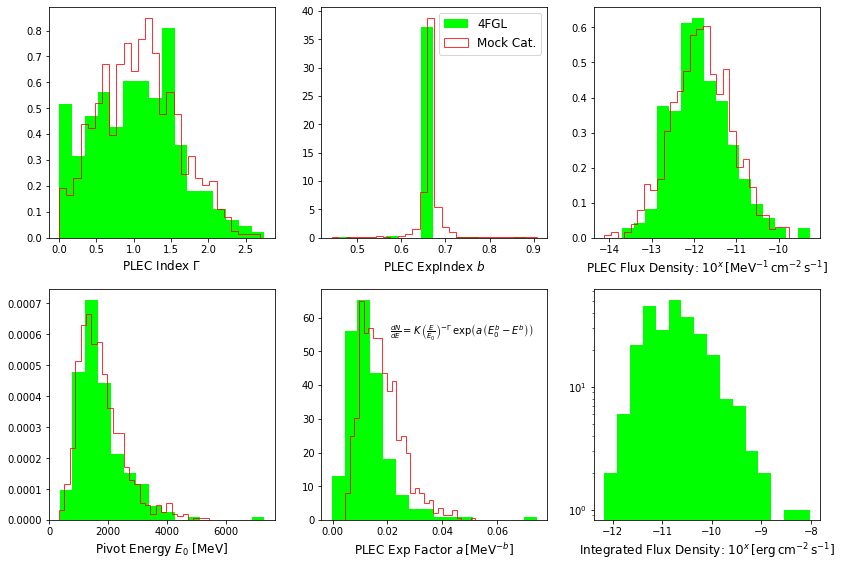

In [185]:
##### Compare the Distribution 
# plt and compare distributions 


PLEC_df_bins = int(np.sqrt(len(v23PLEC_df_PSR)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v23PLEC_df_PSR['PLEC_Index'], density=True, bins=PLEC_df_bins, color='lime', label='4FGL')
plt.hist(PLECIndex_mock_distf, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.') 
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=12)


fig.add_subplot(232)
plt.hist(v23PLEC_df_PSR['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins, color='lime', label='4FGL')
plt.hist(PLECExp_b_mock_dist3f, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v23PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True, color='lime')
plt.hist(np.log10(PLECFden_mock_dist1), bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, 
        histtype='stepfilled', edgecolor='red', fill = False, alpha=0.8)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', 
           fontsize=12)

fig.add_subplot(234)
plt.hist(v23PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True, color='lime')
plt.hist(PLECPivEn_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)


plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(v23PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True, color='lime')
plt.hist(PLECExp_a_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.text(0.021, 55, 
         r'$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \mathrm{exp} \left( a\, \left(E_0^b - E^b \right) \right) $', 
        fontsize=10)

plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=12)

fig.add_subplot(236)
plt.hist(np.log10(v23PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False, color='lime')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.yscale('log')

plt.tight_layout()

plt.savefig('Mock_PSR_4FGLV23_Params%d.png'%(seed1), dpi=180)


#### Spatial Distributions of AGNs and PSRs in the Sky 

max and min of GLAT for PSRs;  71.28936 -68.07345


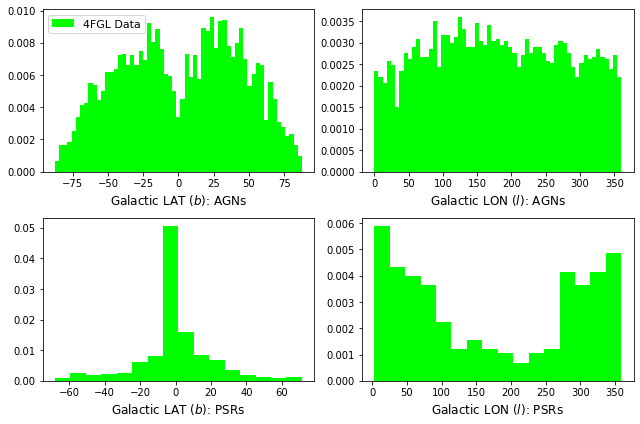

In [71]:
# first check the distribution of GLAT and GLON of the AGNs (selected by Tags)
fig = plt.figure(figsize=(9, 6))

fig.add_subplot(2, 2, 1)
plt.hist(v23LP_df_AGNs['GLAT'], bins=LP_df_AGNs_bins, color='lime', 
         density=True, label='4FGL Data')
# plt.hlines(0.5, -1., 1., linestyle='--', color='red', alpha=0.7)
# plt.text(0.00, 0.6, r'0.5', fontsize=12)
plt.xlabel(r'Galactic LAT $(b)$: AGNs', fontsize=12)
plt.legend(fontsize=11)

fig.add_subplot(2, 2, 2)
plt.hist(v23LP_df_AGNs['GLON'], bins=LP_df_AGNs_bins, color='lime', density=True)
plt.xlabel(r'Galactic LON $(l)$: AGNs', fontsize=12)


fig.add_subplot(223)
plt.hist(v23PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, color='lime', density=True)
plt.xlabel(r'Galactic LAT $(b)$: PSRs', fontsize=12)
print ('max and min of GLAT for PSRs; ', v23PLEC_df_PSR['GLAT'].max(), v23PLEC_df_PSR['GLAT'].min())


fig.add_subplot(224)
plt.hist(v23PLEC_df_PSR['GLON'], bins=PLEC_df_bins, color='lime', density=True)
plt.xlabel(r'Galactic LON $(l)$: PSRs', fontsize=12)



plt.tight_layout()
plt.savefig('4FGL_V23_Spatialdist.png', dpi=180)

#### Mock AGN Distribution (Spatial) 

example sin inv b in rad and tot len :  -0.7486116824898912 13500
example sin inv b in deg:  -42.892289900858394
example gal long in degrees:  98.84120122563424
example val and total length:  115.88431916249074 13500
len of unique list:  13500


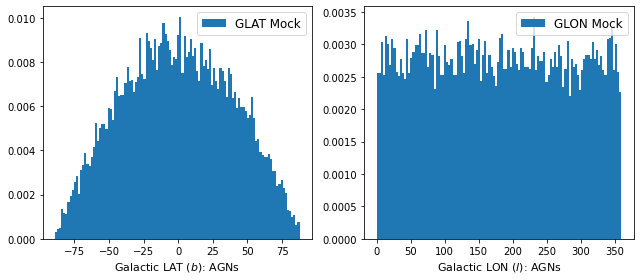

In [73]:
#### choose random coordinates (will be used for AGN coordinates in sky)
# #create a small set of distribution of galactic longitude and sin of latitude. 

sinb = np.random.uniform(-1, 1, LP_df_mockCat_bins) # distribution of sinb from -1, 1
# print ('sinb : ', sinb)
print ('example sin inv b in rad and tot len : ', np.arcsin(sinb[0]), len(sinb)) # radian 
print ('example sin inv b in deg: ', np.rad2deg(np.arcsin(sinb[0]))) # degree


# b will be drawn from sinb distribution 
mock_GLAT = np.rad2deg(np.arcsin(sinb))

fig = plt.figure(figsize=(9, 4))

fig.add_subplot(121)
plt.hist(mock_GLAT, density=True, label='GLAT Mock', bins=int(np.sqrt(LP_df_mockCat_bins)))
plt.xlabel(r'Galactic LAT $(b)$: AGNs', fontsize=11)
plt.legend(fontsize=12)

gal_long_uniform = np.random.uniform(0.0, 2*np.pi, LP_df_mockCat_bins) # already in radian 
# print ('gal long: ', gal_long)
print ('example gal long in degrees: ', np.rad2deg(gal_long_uniform[5]))

mock_GLON = np.rad2deg(gal_long_uniform)
print ('example val and total length: ', mock_GLON[10], len(mock_GLON))
mock_GLON_unique = np.unique(mock_GLON)
print ('len of unique list: ', len(mock_GLON_unique) )

fig.add_subplot(122)
plt.hist(mock_GLON, density=True, label='GLON Mock', bins=int(np.sqrt(LP_df_mockCat_bins)) )
plt.xlabel(r'Galactic LON $(l)$: AGNs', fontsize=11)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('AGN_MockSpatial.png', dpi=160)

#### Mock PSR Disrtibution (Spatial)   

original number of bins:  16
bin counts:  [0.00088655 0.00265965 0.0017731  0.00221638 0.00265965 0.00620585
 0.00797895 0.05053336 0.0159579  0.00842223 0.00664913 0.0035462
 0.0017731  0.00132982 0.00088655 0.00132983]
bins:  [-68.07345   -59.363274  -50.6531    -41.94292   -33.232746  -24.522572
 -15.812395   -7.1022196   1.6079559  10.318131   19.028307   27.738483
  36.448658   45.158833   53.86901    62.579185   71.28936  ]
check fitted params 1st and 2nd gaussian :  [ 5.37848718e-02 -4.66211010e-01  3.16355574e+00  9.25502957e-03
  2.16817874e+00  2.37611314e+01] [ 0.05378487 -0.46621101  3.16355574] [9.25502957e-03 2.16817874e+00 2.37611314e+01]
0.9207927216243448 1.1084047802513532
bin counts LON:  [0.00589132 0.00433185 0.0039853  0.00363876 0.00225256 0.00121292
 0.00155947 0.00121292 0.00103964 0.0006931  0.00103964 0.00121292
 0.00415858 0.00363876 0.00415858 0.00485168]
bins LON:  [  2.787945  25.070583  47.35322   69.63586   91.918495 114.20113
 136.48376  158.7664   181

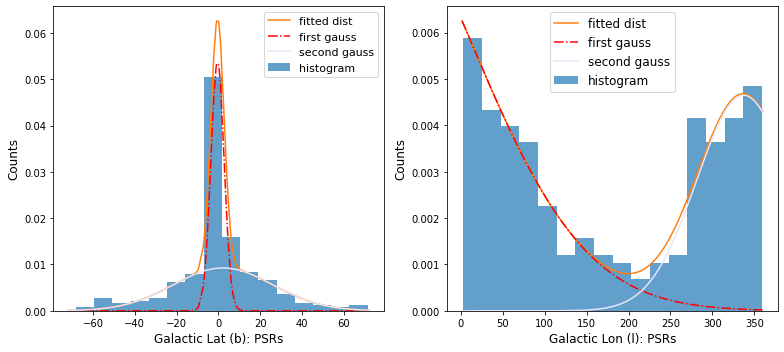

In [190]:
# PLEC_LAT = v22PLEC_df_PSR['GLAT'].to_numpy()
# print (PLEC_LAT.shape)
print ('original number of bins: ', PLEC_df_bins)

pleclatcoord = sorted(np.random.uniform(-72, 72, 300)) # from uniform but sorted (alternative np.linspace)

fig = plt.figure(figsize=(11, 5))

fig.add_subplot(121)

from scipy.optimize import curve_fit

def gauss2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


nLAT, binsLAT, _ = plt.hist(v23PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)

# plt.clf()

bin_centerPLECLAT = (binsLAT[:-1] + binsLAT[1:])/2

print ('bin counts: ', nLAT)
print ('bins: ', binsLAT)

p0lat = [5e-2, 0, 2, 0.01, 0, 17]
params, params_cov = curve_fit(gauss2mix, bin_centerPLECLAT, nLAT, p0=p0lat)

print ('check fitted params 1st and 2nd gaussian : ', params, params[0:3], params[3:])

def firstgauss(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))
def secondgauss(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

# possible_hist_lat = [i*j for i, j in zip(pleclatcoord, his_fitPLECLAT)]

# ### get the fitted curve 
his_fitPLECLAT = gauss2mix(pleclatcoord, *params)
first_hist = firstgauss(pleclatcoord, params[0:3])
second_hist = secondgauss(pleclatcoord, params[3:])

print (sum(first_hist), sum(second_hist))


# print ('length of generated data and max, min', len(his_fitPLECLAT), np.max(his_fitPLECLAT), 
#       np.min(his_fitPLECLAT))

# plt.plot(bin_centerPLECLAT, n, label='true dist')
plt.plot(pleclatcoord, his_fitPLECLAT, label='fitted dist')
plt.plot(pleclatcoord, first_hist, color='red', linestyle = '-.', label='first gauss')
plt.plot(pleclatcoord, second_hist, color='lavender', label='second gauss')

# plt.bar(pleclatcoord, height=his_fitPLECLAT, color='lime')
plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=11, loc='best')





plecloncoord = sorted(np.random.uniform(0, 360, 300))

fig.add_subplot(122)
nLON, binsLON, _ = plt.hist(v23PLEC_df_PSR['GLON'], bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)

bin_centerPLECLON = (binsLON[:-1] + binsLON[1:])/2

print ('bin counts LON: ', nLON)
print ('bins LON: ', binsLON)

def gaussoffset2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    g1 = A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) 
    g2 = A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))
    return g1 + g2



p0lon = [2e-2, -90, 100, 8e-3, 330, 70]

paramsLON, params_covLON = curve_fit(gaussoffset2mix, bin_centerPLECLON, nLON, p0=p0lon)
print ('check fitted params 1st and 2nd gaussian LON: ', paramsLON[0:3], paramsLON[3:])

def firstgaussoffset(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))

def secondgaussoffset(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


### get the fitted curve 
his_fitPLECLON = gaussoffset2mix(plecloncoord, *paramsLON)
first_histLON  = firstgaussoffset(plecloncoord, paramsLON[0:3])
second_histLON = secondgaussoffset(plecloncoord, paramsLON[3:])

# plt.plot(bin_centerPLECLON, nLON, label='true dist')
plt.plot(plecloncoord, his_fitPLECLON, label='fitted dist')
plt.plot(plecloncoord, first_histLON, linestyle = '-.', color='red', label='first gauss')
plt.plot(plecloncoord, second_histLON, color='lavender', label='second gauss')
# plt.hist(his_fitPLECLON, bins=PLEC_df_bins, histtype='stepfilled', 
#          edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
# plt.bar(plecloncoord, height=his_fitPLECLON, color='lime')

plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.savefig('LATLONfitted_dist_psrV23.png', dpi=160)

# # mock_LON_psr = random.sample()

check min and max of LAT hist:  63.41837568334992 -61.29502914195325
check min and max of LAT hist after selection:  63.41837568334992 -61.29502914195325
selected number of LATs:  860
check few values:  [ 0.91563684 -4.07618885 -1.85329301]
check min and max of LON hist:  507.31114837251505 -689.101012762085
check min and max of LON hist after selection:  359.84541928095814 0.22683015593230493
selected number of LONs:  681


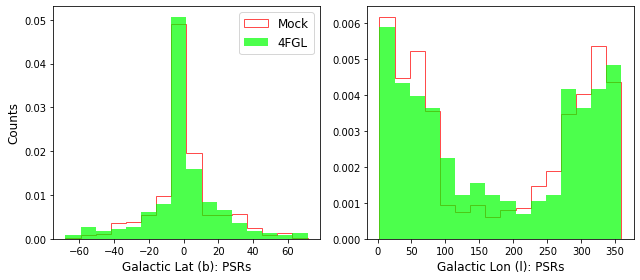

In [62]:
# his_fitPLECLATsum = sum(his_fitPLECLAT)
# his_fitPLECLATfac = 1/his_fitPLECLATsum

# print (sum((his_fitPLECLAT)*his_fitPLECLATfac))

fig = plt.figure(figsize=(9, 4))

fig.add_subplot(121)
possible_PSR_lat1 = np.random.normal(-0.5,  3.56443164, 550)
# possible_PSR_lat1_selected = random.sample(possible_PSR_lat1.tolist(), 200)
possible_PSR_lat1_selected = np.random.choice(possible_PSR_lat1, 430)
# print (possible_PSR_lat1)
# possible_PSR_lat1_selected = np.random.choice(possib)
# plt.hist(possible_PSR_lat1, bins=binsLAT, density=True, color='r', alpha=0.7)
possible_PSR_lat2 = np.random.normal(2.16, 2.68265452e+01, 550)
# possible_PSR_lat2_selected = random.sample(possible_PSR_lat2.tolist(), 200)
possible_PSR_lat2_selected = np.random.choice(possible_PSR_lat2, 430)
# plt.hist(possible_PSR_lat2, bins=binsLAT, density=True, alpha=0.6)

total_hist = (possible_PSR_lat1) + (possible_PSR_lat2)
total_histLAT1 = np.concatenate((possible_PSR_lat1_selected, possible_PSR_lat2_selected))
print ('check min and max of LAT hist: ', max(total_histLAT1), min(total_histLAT1))
total_histLAT1f = total_histLAT1[(total_histLAT1>-80.) & (total_histLAT1<80.)]
print ('check min and max of LAT hist after selection: ', max(total_histLAT1f), min(total_histLAT1f))
print ('selected number of LATs: ', len(total_histLAT1f))

# draw = np.random.choice(total_hist, 290, p=(his_fitPLECLAT*his_fitPLECLATfac))
# draw = random.sample(total_hist.tolist(), 200)

plt.hist(total_histLAT1, bins=binsLAT, density=True, histtype='stepfilled', edgecolor='red', alpha=0.7, 
         fill=False, label='Mock')

plt.hist(v23PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, density=True, color='lime', 
         alpha=0.7, label='4FGL')

plt.legend(fontsize=12)

plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
print ('check few values: ', total_histLAT1[0:3])


fig.add_subplot(122)

num_select = 5680
seed = 16
np.random.seed(seed)


def psrLON1(num_select):
    possible_PSR_LON1 = np.random.normal(-2.19250209e+02, 1.44911680e+02, num_select)  
    possible_PSR_LON1_selected = np.random.choice(possible_PSR_LON1, int(num_select*0.93) )
    return possible_PSR_LON1_selected
# plt.hist(possible_PSR_LON1, bins=binsLON, density=True, alpha=0.7)
# possible_PSR_
def psrLON2(num_select):
    possible_PSR_LON2 = np.random.normal(3.21788428e+02, 4.96174001e+01, num_select)
    possible_PSR_LON2_selected = np.random.choice(possible_PSR_LON2, int(num_select*0.07) )
    return possible_PSR_LON2_selected
# plt.hist(possible_PSR_LON2, bins=binsLON, density=True, alpha=0.7, color='red')

total_hist_LON = np.concatenate((psrLON1(num_select), psrLON2(num_select) ))
total_histLONf = total_hist_LON[(total_hist_LON>-0.) & (total_hist_LON<360.)]


plt.hist(total_histLONf, bins=binsLON, density=True, histtype='stepfilled', fill=False, 
         edgecolor='red', alpha=0.7, label='Mock')
plt.hist(v23PLEC_df_PSR['GLON'], bins=PLEC_df_bins, density=True, color='lime', 
         alpha=0.7, label='4FGL')
plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)

plt.tight_layout()
plt.savefig('Mock_4FGLV23_PSR_LATLON.png', dpi=180)

print ('check min and max of LON hist: ', max(total_hist_LON), min(total_hist_LON))
print ('check min and max of LON hist after selection: ', max(total_histLONf), min(total_histLONf))
print ('selected number of LONs: ', len(total_histLONf))

min and max val of lowest bin width:  -12.378695 -9.002079


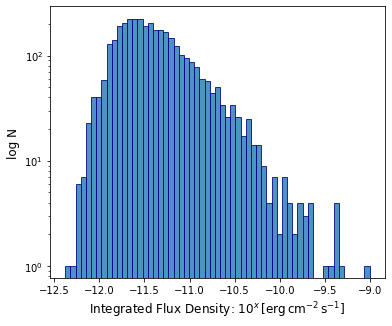

In [74]:
#### plot the Energy flux 100 distribution 
fig = plt.figure(figsize=(6, 5))
E100hist, E100bins, _ = plt.hist(np.log10(v23LP_df_AGNs['En_flux_100']), bins=LP_df_AGNs_bins, 
                                 density=False, alpha=0.8, edgecolor='navy')
plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.ylabel('log N', fontsize=12)

print ('min and max val of lowest bin width: ', E100bins[0], E100bins[-1])

In [75]:
print ('check the Energy Flux bins and length: ', len(E100bins)) # len nbins + 1, nbins = E100hist 
# should be considered as binwidths

print ('number of entries: ', len(v23LP_df_AGNs['En_flux_100']))  

print ('check for duplicated values: ', v23LP_df_AGNs.duplicated(subset=['En_flux_100']).any() )
# no duplicate values: 

print ('check the length of histogram values: ', len(E100hist))  # number of sources in each energy bin
# once again the number of bins are higher 

print ('\n')

print ('check the histogram values: ', type(E100hist))
print ('sum of the histogram values: ', sum(E100hist))

E100hist_list = E100hist.tolist()
print ('list of values :', E100hist_list)

print ('bins: ', E100bins)

check the Energy Flux bins and length:  60
number of entries:  3502
check for duplicated values:  False
check the length of histogram values:  59


check the histogram values:  <class 'numpy.ndarray'>
sum of the histogram values:  3502.0
list of values : [1.0, 1.0, 6.0, 7.0, 23.0, 40.0, 40.0, 59.0, 129.0, 140.0, 190.0, 202.0, 221.0, 224.0, 221.0, 191.0, 205.0, 174.0, 175.0, 167.0, 147.0, 123.0, 101.0, 95.0, 87.0, 78.0, 60.0, 57.0, 44.0, 50.0, 34.0, 26.0, 34.0, 26.0, 17.0, 25.0, 14.0, 14.0, 9.0, 4.0, 7.0, 2.0, 7.0, 4.0, 2.0, 4.0, 3.0, 4.0, 0.0, 0.0, 1.0, 1.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
bins:  [-12.378695  -12.321464  -12.264233  -12.207003  -12.149772  -12.092541
 -12.03531   -11.978079  -11.920848  -11.863618  -11.806387  -11.749156
 -11.691925  -11.634694  -11.577464  -11.520233  -11.463002  -11.405771
 -11.34854   -11.29131   -11.234079  -11.176848  -11.119617  -11.0623865
 -11.005156  -10.947926  -10.890695  -10.833464  -10.776233  -10.719002
 -10.661772  -10.604541  -10.547

In [76]:
E100bins_notlast = list(E100bins)
E100bins_notlast.remove(E100bins_notlast[-1])

print ('all but last : ', E100bins_notlast) # used later for filling up entries

all but last :  [-12.378695, -12.321464, -12.264233, -12.207003, -12.149772, -12.092541, -12.03531, -11.978079, -11.920848, -11.863618, -11.806387, -11.749156, -11.691925, -11.634694, -11.577464, -11.520233, -11.463002, -11.405771, -11.34854, -11.29131, -11.234079, -11.176848, -11.119617, -11.0623865, -11.005156, -10.947926, -10.890695, -10.833464, -10.776233, -10.719002, -10.661772, -10.604541, -10.54731, -10.490079, -10.432848, -10.375618, -10.318387, -10.261156, -10.203925, -10.146694, -10.089463, -10.032233, -9.975002, -9.917771, -9.86054, -9.803309, -9.746079, -9.6888485, -9.631618, -9.574387, -9.517156, -9.459926, -9.402695, -9.345464, -9.288233, -9.231002, -9.173771, -9.116541, -9.05931]


In [77]:
# find the bin widths 
E100bin_widths = []
for i in range(1, len(E100bins)):
    bin_width = E100bins[i] - E100bins[i-1]
    E100bin_widths.append(bin_width)
print ('check the bin width list: ', E100bin_widths)
print ('\n')
print ('!!!! bin widths should be nearly same !!!!')

check the bin width list:  [0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.05723095, 0.057229996, 0.05723095, 0.05723095]


!!!! bin widths should be nearly same !!!!


check some values of the noise_N:  1.2588100176576147 0.8948016763621413 0.9356891641861015


(array([1.4142986 , 2.22246924, 1.81838392, 2.22246924, 1.4142986 ,
        1.21225595, 1.61634126]),
 array([0.70847267, 0.79236165, 0.87625063, 0.96013961, 1.04402859,
        1.12791757, 1.21180655, 1.29569553]),
 <a list of 7 Patch objects>)

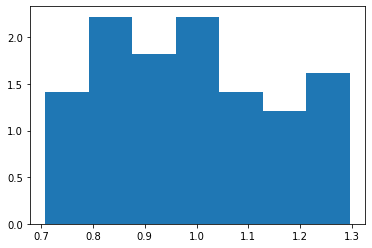

In [78]:
#### introduce the poisson noise (used later for filling source)

noise_N = np.random.uniform(0.7, 1.3, LP_df_AGNs_bins)    

print ('check some values of the noise_N: ', noise_N[5], noise_N[20], noise_N[40])  
plt.hist(noise_N, density=True, bins=7)

check some values of the noise_N:  1.0864861216410011 1.0264817725829078 1.260310085991148


(array([2.4250383, 1.6166922, 1.6166922, 2.4250383, 1.6166922, 0.8083461,
        2.4250383]),
 array([0.75382203, 0.8311404 , 0.90845876, 0.98577713, 1.0630955 ,
        1.14041386, 1.21773223, 1.2950506 ]),
 <a list of 7 Patch objects>)

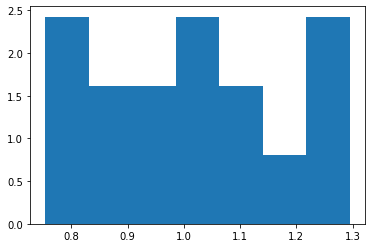

In [79]:
np.random.seed(30) # change seed for different run
noise_N_PLEC = np.random.uniform(0.7, 1.3, PLEC_df_bins)    

print ('check some values of the noise_N: ', noise_N_PLEC[0], noise_N_PLEC[11], noise_N_PLEC[14])  
plt.hist(noise_N_PLEC, density=True, bins=7)

#### PSR Binned Distribution and Info: 

min and max val of lowest bin width:  -12.166801 -8.027294
all bins PLEC E100 :  [-12.166801 -11.908082 -11.649363 -11.390644 -11.131925 -10.873205
 -10.614487 -10.355767 -10.097048  -9.838328  -9.579609  -9.32089
  -9.062171  -8.803452  -8.544733  -8.286014  -8.027294]


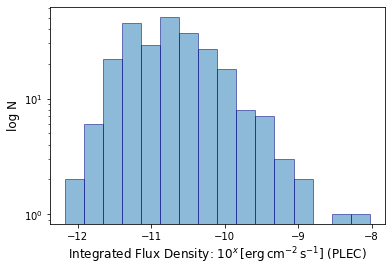

In [80]:
fig = plt.figure(figsize=(6, 4))

E100histPLEC, E100binsPLEC,_ = plt.hist(np.log10(v23PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, 
                                density=False, alpha=0.5, edgecolor='navy')

print ('min and max val of lowest bin width: ', E100binsPLEC[0], E100binsPLEC[-1])

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (PLEC)', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)


E100histPLEC_list = E100histPLEC.tolist()

E100bins_notlastPLEC = list(E100binsPLEC)
E100bins_notlastPLEC.remove(E100bins_notlastPLEC[-1])

print ('all bins PLEC E100 : ', E100binsPLEC)

#### Understanding the 'Energy_Flux100' Variable: 

LP Formulation : $f_{\text{LP}} (E) = \frac{dN}{dE} = K\, \left(\frac{E}{E_0} \right)^{-\alpha -\beta \, \text{log}\, \left(\frac{E}{E_0}\right) } $. 

Integrating as $\int \limits _{100}^{1e5}  E \times f_{\text{LP}}(E) $ (unit of limits are in MeV) should give us Energy flux with unit $\text{MeV}\, \text{cm}^{-2}\, \text{s}^{-1}$, converting this to $\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$ (by multiplying with 1.60e-6), should be approximately equal to Energy_Flux100 variable. 

In [81]:
### just checking some simple integration of log parabola formulation
### from the AGN dataframe take the parameters from any row with spectype=logparabola. 
### here the values are used from row 3 of v23LP_df_AGNs DataFrame
### Source name : 4FGL J0001.5+2113


alpha1 = 2.548151 
beta1 = 0.158776
PivEn = 355.784424 # MeV
FluxDensity = 4.532746e-11 # cm^-2 MeV^-1 s^-1 # LP sigma value ~ 7.32 > 3



def Integrate(N, a, b, alpha=alpha1, beta=beta1, PivEn=PivEn, 
              FluxDensity=FluxDensity): # number of steps, lower and upper limit 
    value = 0
    value2 = 0
    
    for i in range(1, N+1):
        En1 = a + ( (i-1/2)* ( (b-a)/ N ) )
        x = En1*FluxDensity * ((En1/PivEn)**(- alpha - ( beta *(math.log(En1/PivEn)) ) ))
#         value += LP(En1 , alpha1, beta1, PivEn, FluxDensity)
        value += x
    value2 = ( (b-a)/N ) * value
    return value2

result = Integrate(1080, 100, 100e3) # 100 MeV to 100 GeV
print ('check result in MeV cm^-2 s^-1 :', result)
print ('check result in erg cm^-2 s^-1: ', result*1.60e-6)
print ('Given Value in erg cm^-2 s^-1: ', 2.614211e-11)

check result in MeV cm^-2 s^-1 : 1.5989383599410075e-05
check result in erg cm^-2 s^-1:  2.558301375905612e-11
Given Value in erg cm^-2 s^-1:  2.614211e-11


PLEC Parametrization: $\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

Check the integration $\int \limits _{100}^{1e5}  E \times f_{\text{LP}}(E) $ (unit of limits are in MeV) should give us Energy flux with unit $\text{MeV}\, \text{cm}^{-2}\, \text{s}^{-1}$, converting this to $\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$ (by multiplying with 1.60e-6), should be approximately equal to Energy_Flux100 variable. 

In [82]:
### checking integration for PLEC parametrization 
### here we include values from row 2nd of v22PLEC_df_PSR



PLEC_f_density_example = 3.477769e-11 # cm^-2 MeV^-1 s^-1 
PLEC_index_example = 1.068375
PLEC_Exp_b_example = 0.565947
PLEC_Exp_a_example = 0.020463
PLEC_PivEn_example = 1472.989990 # MeV


def IntegratePLEC(N, E1, E2, PivEn = PLEC_PivEn_example, fD = PLEC_f_density_example, 
                 gamma = PLEC_index_example, a = PLEC_Exp_a_example, 
                 b = PLEC_Exp_b_example):
    value = 0.
    value1 = 0. 
    for i in range(1, N+1):
        En1 = E1 + ( (i-1/2)* ( (E2-E1)/ N ) )
        x = En1 * fD * ((En1/PivEn)**(-gamma)) * math.exp(a * (PivEn**b - En1**b))
        value +=x
    value1 = ( (E2-E1)/N ) * value
    return value1


resultPLEC = IntegratePLEC(1100, 100, 100e3) # 100 MeV to 100 GeV
print ('check result in MeV cm^-2 s^-1 :', resultPLEC)
print ('check result in Erg cm^-2 s^-1: ', resultPLEC*1.60e-6)
print ('Given Value in Erg cm^-2 s^-1: ', 4.297058e-10 ) ###### great !!!!

check result in MeV cm^-2 s^-1 : 0.00026811006922102524
check result in Erg cm^-2 s^-1:  4.2897611075364037e-10
Given Value in Erg cm^-2 s^-1:  4.297058e-10


#### Generation of Catalogue 

In [83]:

rand_LPIndex_mock_dist    = random.sample(LPIndex_mock_dist2.tolist(), 12500)
rand_LPBeta_mock_dist     = random.sample(LPBeta_mock_dist2.tolist(), 12500)
rand_LPFDensity_mock_dist = random.sample(LPFDensity_mock_dist1.tolist(), 12500)
rand_LPPivEn_mock_dist    = random.sample(LPPivEn_mock_dist3.tolist(), 12500)

rand_GLAT                 = random.sample(mock_GLAT.tolist(), 12500)
rand_GLON                 = random.sample(mock_GLON.tolist(), 12500)

In [84]:
#### randomly select parameters from the distribution [PLEC]

rand_PLEC_f_density = random.sample(PLECFden_mock_dist1.tolist(), 660) 
rand_PLEC_index = random.sample(PLECIndex_mock_distf.tolist(), 660)
rand_PLEC_Exp_b = random.sample(PLECExp_b_mock_dist3f.tolist(), 660)
rand_PLEC_Exp_a = random.sample(PLECExp_a_mock_dist3.tolist(), 660)
rand_PLEC_PivEn = random.sample(PLECPivEn_mock_dist3.tolist(), 660)

rand_GLAT_PLEC = random.sample(total_histLAT1f.tolist(), 660)
rand_GLON_PLEC = random.sample(total_histLONf.tolist(), 660)

In [94]:
def simple_lum(n):
    result_list = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list = []
    c_lp_a   = [] # AGN alpha
    c_lp_b   = [] # AGN beta
    c_lp_F   = [] # flux density
    c_lp_PEn = [] # pivot  energy
    c_GLAT   = [] # lat
    c_GLON   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(11680):
        LP_index = rand_LPIndex_mock_dist[x]
        LP_beta  = rand_LPBeta_mock_dist[x]
        LP_FD    = rand_LPFDensity_mock_dist[x]
        LP_PEn   = rand_LPPivEn_mock_dist[x]
        LP_glat  = rand_GLAT[x]
        LP_glon  = rand_GLON[x]

        
        
        result   = Integrate(n, 100, 100e3, alpha=LP_index, beta=LP_beta, PivEn=LP_PEn, FluxDensity=LP_FD)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result   = result * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        if result>=4.181239071515e-13 and result <= 9.95405417351e-10: # 10**(lbin), 10**(hbin)
            result_list.append(result)

            c_lp_a.append(LP_index)
            c_lp_b.append(LP_beta)
            c_lp_F.append(LP_FD)
            c_lp_PEn.append(LP_PEn)
            c_GLAT.append(LP_glat)
            c_GLON.append(LP_glon)
            
            mockE100hist, bins = np.histogram(np.log10(result_list), bins=E100bins, density=False)
            mockE100hist_list = mockE100hist.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list, E100hist_list, noise_N): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list = result_list[:]
                    c_lp_a.pop()
                    c_lp_b.pop()
                    c_lp_F.pop()
                    c_lp_PEn.pop()
                    c_GLAT.pop()
                    c_GLON.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list, c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON

In [95]:
final_result_list, c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON = simple_lum(1070)

print('check the number of selected sources: \n', len(c_lp_a))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 1 0.0


!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 9 

!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the

!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher th

!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the rea

!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher th

!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 57 57.0
!!! mo

!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 13 14.0
!!! mock highe

!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 8 7.0
!!! mock highe

!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than 

!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 113 95.0
!

!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 80 101.0
!!! mock

!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 1 1.0
!!! m

!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 28 34.0
!!! mock higher than the real !!! 1 1.0
!!! 

!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 5 6.0
!!! moc

!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 145 167.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 139 123.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 139 12

!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 145 167.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 130 129.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 145 167.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 31 26.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!

!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 180 174.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 139 123.0
!!! mock higher than the real !!! 180 174.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 13 14.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 80 1

!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 130 129.0
!!! mock higher than the real !!! 145 167.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 25 26.0
!!! mock higher than the real !!! 58 50.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the 

!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 145 167.0
!!! mock higher than the real !!! 203 205.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 180 174.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 180 174.0
!!! mock higher than the 

!!! mock higher than the real !!! 9 9.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 203 205.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 203 205.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 171 190.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 171 190.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 31 34.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 4 4.0
!!! mock higher than the real !!! 128 140.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 189 221.

!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 32 23.0
!!! mock higher than the real !!! 130 129.0
!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 169 175.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the real !!! 56 44.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 203 205.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 130 129.0
!!! mock higher than the real !!! 32 40.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 80 101.0
!!! mock higher than the r

!!! mock higher than the real !!! 23 17.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 5 6.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 116 87.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 36 25.0
!!! mock higher than the real !!! 7 7.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 113 95.0
!!! mock higher than the real !!! 15 14.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 57 57.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 165 147.0
!!! mock higher than the real !!! 71 60.0
!!! mock higher than the real !!! 189 221.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 76 78.0
!!! mock higher than the real !!! 66 59.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 36 25.0
!!! mock

3450


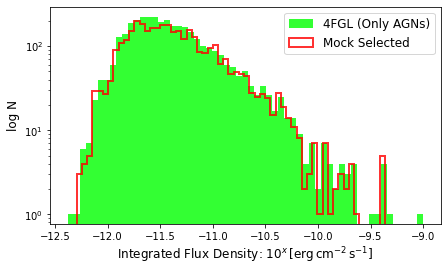

In [127]:
plt.figure(figsize=(7, 4))


plt.hist(np.log10(v23LP_df_AGNs['En_flux_100']), bins=LP_df_AGNs_bins, density=False, 
         label='4FGL (Only AGNs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list), bins=LP_df_AGNs_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)
plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)


print(len(final_result_list))

len of Flux Density:  3450


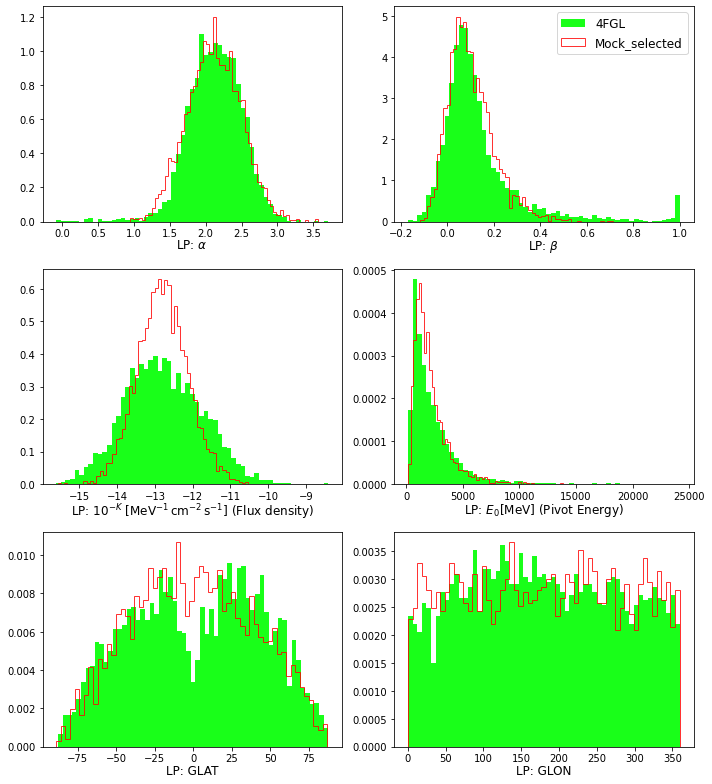

In [145]:
# print for sanity check @ length of all lists of parameters should be same

# compare the 4FGL original distribution and the selected parameters distribution 


fig = plt.figure(figsize=(10, 11))

fig.add_subplot(321)


plt.hist(v23LP_df_AGNs['LP_index'], bins=LP_df_AGNs_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_a, bins=LP_df_AGNs_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\alpha$', fontsize=12, labelpad=0.1)
# plt.legend(fontsize=12)


fig.add_subplot(322)


plt.hist(v23LP_df_AGNs['LP_beta'], bins=LP_df_AGNs_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_b, bins=LP_df_AGNs_bins, density=True, label='Mock_selected', 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\beta$', fontsize=12, labelpad=0.1)
plt.legend(fontsize=12)

print ('len of Flux Density: ', len(c_lp_F))
fig.add_subplot(323) # log of flux density is plotted 

plt.hist(np.log10(v23LP_df_AGNs['LP_f_density']), bins=LP_df_AGNs_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_lp_F), bins=LP_df_AGNs_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $10^{-K}\, \, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=12, labelpad=0.1)

fig.add_subplot(324)

plt.hist(v23LP_df_AGNs['Piv_En'], bins=LP_df_AGNs_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_PEn, bins=LP_df_AGNs_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12, labelpad=0.1)

fig.add_subplot(325)

plt.hist(v23LP_df_AGNs['GLAT'], bins=LP_df_AGNs_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLAT, bins=LP_df_AGNs_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLAT', fontsize=12, labelpad=0.1)

fig.add_subplot(326)

plt.hist(v23LP_df_AGNs['GLON'], bins=LP_df_AGNs_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLON, bins=LP_df_AGNs_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLON', fontsize=12, labelpad=0.1)

plt.tight_layout()
plt.savefig('MockSelected_AGN_4FGLV23_Params.png', dpi=180)

In [122]:
#### check the min max value of different params for the mock catalog

print ('mock cat alpha max; ', max(c_lp_a))
print ('mock cat alpha min; ', min(c_lp_a))

print ('mock cat beta max; ', max(c_lp_b))
print ('mock cat beta min; ', min(c_lp_b))

print ('mock cat beta max; ', max(c_lp_F))
print ('mock cat beta min; ', min(c_lp_F))

print ('mock cat beta max; ', max(c_lp_PEn))
print ('mock cat beta min; ', min(c_lp_PEn))

mock cat alpha max;  3.5662132893899203
mock cat alpha min;  0.9384231207961471
mock cat beta max;  0.7135410918821664
mock cat beta min;  -0.11574515555776681
mock cat beta max;  2.9579432278714725e-11
mock cat beta min;  2.627788411410749e-16
mock cat beta max;  13834.638568471362
mock cat beta min;  159.52037607493088


#### Follow similar procedure for Pulsar

In [123]:
def simple_lum_plec(n):
    result_list = []
#     comp_list = [0] * len(E100hist_list)
    f_result_list = []
    c_plec_i   = [] # PLEC index
    c_plec_Expa   = [] # PLEC_Exp_a
    c_plec_Expb   = [] # PLEC_Exp_b
    c_plec_FD   = [] # plec fd
    c_plec_PEn = [] # pivot  energy
    c_GLAT_plec   = [] # lat
    c_GLON_plec   = [] # long

    for x in range(583):
        PLEC_index = rand_PLEC_index[x]
        PLEC_Ea   = rand_PLEC_Exp_a[x]
        PLEC_Eb   = rand_PLEC_Exp_b[x]
        PLEC_FD   = rand_PLEC_f_density[x]
        PLEC_PEn  = rand_PLEC_PivEn[x]
        PLEC_glat = rand_GLAT_PLEC[x]
        PLEC_glon  = rand_GLON_PLEC[x]

        
        
        result   = IntegratePLEC(n, 100, 100e3, PivEn = PLEC_PEn, fD = PLEC_FD, 
                 gamma = PLEC_index, a = PLEC_Ea, b = PLEC_Eb)
        # unit here is MeV cm^-2 s^-1 :
        result   = result * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        if result>=6.67298272e-13 and result <= 9.3779735e-09:
            result_list.append(result)

            c_plec_i.append(PLEC_index)
            c_plec_Expa.append(PLEC_Ea)
            c_plec_FD.append(PLEC_FD)
            c_plec_PEn.append(PLEC_PEn)
            c_plec_Expb.append(PLEC_Eb)
            c_GLAT_plec.append(PLEC_glat)
            c_GLON_plec.append(PLEC_glon)
            
            mockE100hist_plec, bins_plec = np.histogram(np.log10(result_list), bins=E100binsPLEC, 
                                                        density=False)
            mockE100hist_plec_list = mockE100hist_plec.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_plec_list, E100histPLEC_list, noise_N_PLEC): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list.pop()
#                     print ('result_list len: ', len(result_list))
                    f_result_list = result_list[:]
                    c_plec_i.pop()
                    c_plec_Expa.pop()
                    c_plec_Expb.pop()
                    c_plec_FD.pop()
                    c_plec_PEn.pop()
                    c_GLAT_plec.pop()
                    c_GLON_plec.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return f_result_list, c_plec_i, c_plec_Expa, c_plec_Expb, c_plec_FD, c_plec_PEn, c_GLAT_plec, c_GLON_plec

In [124]:
f_result_list_pl, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_FD, c_pl_PEn, c_GLAT_pl, c_GLON_pl = simple_lum_plec(960)

!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 9 8.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 7 6.0
!!! mock higher than the real !!! 7 6.0
!!! mock higher than the real !!! 9 8.0
!!! mock higher than the real !!

!!! mock higher than the real !!! 23 29.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 33 27.0
!!! mock higher than the real !!! 23 29.0
!!! mock higher than the real !!! 29 37.0
!!! mock higher than the real !!! 9 8.0
!!! mock higher than the real !!! 9 7.0
!!! mock higher than the real !!! 23 29.0
!!! mock higher than the real !!! 29 37.0
!!! mock higher than the real !!! 9 8.0
!!! mock higher than the real !!! 33 27.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 29 37.0
!!! mock higher than the real !!! 7 6.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 21 22.0
!!! mock higher than the real !!! 18 18.0
!!! mock higher than the real !!! 29 37.0
!!! mock higher than the real !!! 21 22.0
!!! mock higher than the real !!! 33 27.0
!!! mock higher than the real !!! 21 22.0
!!! mock

selected  index plec:  254
number of selected sources (PSRs);  254


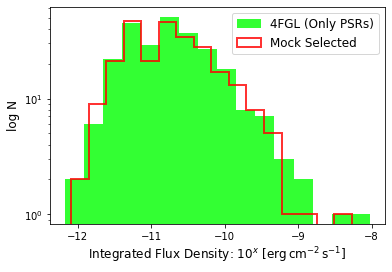

In [131]:
print ('selected  index plec: ', len(c_pl_i))

mock_source_num_plec = [i for i in range(len(c_pl_i))]


fig = plt.figure(figsize=(6, 4))


plt.hist(np.log10(v23PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False, 
         label='4FGL (Only PSRs)', color='lime', alpha=0.8)

plt.hist(np.log10(f_result_list_pl), bins=PLEC_df_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)



plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\,\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)

plt.legend(fontsize=12)

plt.savefig('Integrated_E100_mock_4FGLV23_PSRs.png', dpi=200)

print('number of selected sources (PSRs); ', len(f_result_list_pl))

len of Flux Density:  254
min and max GLON:  0.4358908972592417 359.46877190914245
min and max GLAT:  -54.5924908346628 63.41837568334992
<class 'list'>


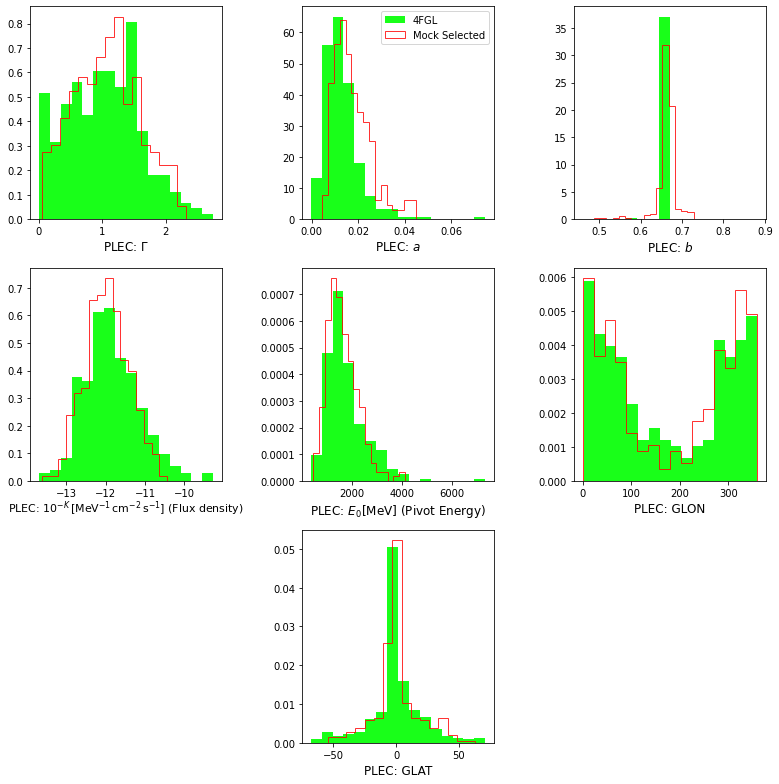

In [191]:
#### Plot the selected parameter distribution 

# print for sanity check @ length of all lists of parameters should be same
# compare the 4FGL original distributio and the selected parameters distribution 


fig = plt.figure(figsize=(11, 11))

fig.add_subplot(331)


plt.hist(v23PLEC_df_PSR['PLEC_Index'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_pl_i, bins=PLEC_df_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')
plt.xlabel(r'PLEC: $\Gamma$', fontsize=12)



fig.add_subplot(332)

plt.hist(v23PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True, 
         label='4FGL', color= 'lime', alpha=0.9)

plt.hist(c_pl_Expa, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red', label='Mock Selected')
plt.xlabel(r'PLEC: $a$', fontsize=12)
plt.legend(fontsize=10)
# plt.legend(fontsize=12)

fig.add_subplot(333)

plt.hist(v23PLEC_df_PSR['PLEC_ExpIndex'], bins=PLEC_df_bins, density=True, 
         label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_pl_Expb, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: $b$', fontsize=12)


print ('len of Flux Density: ', len(c_pl_FD))
fig.add_subplot(334) # log of flux density is plotted 

plt.hist(np.log10(v23PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)

plt.hist(np.log10(c_pl_FD), bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, 
         alpha=0.8, edgecolor='red')

plt.xlabel(r'PLEC: $10^{-K}\,  [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=11, labelpad=0.1)

fig.add_subplot(335)


plt.hist(v23PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(c_pl_PEn, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')


plt.xlabel(r'PLEC: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12)


fig.add_subplot(336)
print ('min and max GLON: ', min(c_GLON_pl), max(c_GLON_pl))


plt.hist(v23PLEC_df_PSR['GLON'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLON_pl, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: GLON', fontsize=12)


fig.add_subplot(338)
print ('min and max GLAT: ', min(c_GLAT_pl), max(c_GLAT_pl))


plt.hist(v23PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLAT_pl, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: GLAT', fontsize=12)



plt.tight_layout()

plt.savefig('MockSelected_PSR_4FGLV23_Params.png', dpi=200)

print (type(c_GLAT_pl))

#### Create the Mock 4FGL File 

This file will be used to create model skymap using [fermitools](https://github.com/fermi-lat/Fermitools-conda/wiki).  

In [52]:
# mock_source_num = [i for i in range(len(c_lp_a))]

# mock_xmlfile = open('mock_4FGL_V23.xml', 'w')
# mock_xmlfile.write('<source_library title="source library">\n')
# for n, al, be, pivE, ra, dec, num in zip(c_lp_F, c_lp_a, c_lp_b, c_lp_PEn, c_GLON, c_GLAT, mock_source_num):
    
#     mock_xmlfile.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
#     mock_xmlfile.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
#     mock_xmlfile.write('<spectrum type="LogParabola">\n')
#     mock_xmlfile.write(
#         '<parameter free="1" max="1e-10" min="1e-17" name="norm" scale="1.0" value="{0}"/>\n'.format(n))
#     mock_xmlfile.write(
#         '<parameter free="1" max="4" min="0.1" name="alpha" scale="1.0" value="{0}"/>\n'.format(al))
#     mock_xmlfile.write(
#         '<parameter free="1" max="2.2e5" min="130" name="Eb" scale="1" value="{0}"/>\n'.format(pivE))
#     mock_xmlfile.write(
#         '<parameter free="1" max="0.70" min="-0.13" name="beta" scale="1.0" value="{0}"/>\n'.format(be))
#     mock_xmlfile.write('</spectrum>\n')
#     mock_xmlfile.write('<spatialModel type="SkyDirFunction">\n')
#     mock_xmlfile.write(
#         '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
#     mock_xmlfile.write(
#         '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
#     mock_xmlfile.write('</spatialModel>\n')
#     mock_xmlfile.write('</source>\n')
    
# mock_xmlfile.write('</source_library>')    
# mock_xmlfile.close()    

#### Create the Mock Catalog xml File (PSRs)

In the docs: 
"For modeling pulsars. Note that the PLSuperExpCutoff spectral shape in the 4FGL corresponds to PLSuperExpCutoff2 in the Fermitools." 

The definition given in the documentation is different from the original paper. 

Definition in _docs_ :  $\frac{dN}{dE} = N_0 \, \left(\frac{E}{E_0}\right)^{\gamma _1}\, \text{exp}(-aE^{\gamma _2})$

Definition in _4FGL paper_ : $\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

Also for later usage the original 4FGL catalog were selected using similar values. Both these xml files were used to generate and compare all skymap.   

In [148]:
#### mock cat  for pulsar 
##### first check max and min values of each params; 

print ('max and min of PLEC index mock: ', max(c_pl_i), min(c_pl_i))
print ('max and min of PLEC Exp a mock: ', max(c_pl_Expa), min(c_pl_Expa))
print ('max and min of PLEC Exp b mock: ', max(c_pl_Expb), min(c_pl_Expb))
print ('max and min of PLEC Piv En mock: ', max(c_pl_PEn), min(c_pl_PEn))
print ('max and min of PLEC FD mock: ', max(c_pl_FD), min(c_pl_FD))

max and min of PLEC index mock:  2.3237570309230087 0.04314014364943819
max and min of PLEC Exp a mock:  0.044835963408895584 0.004563087495418917
max and min of PLEC Exp b mock:  0.7280199463288378 0.4872636544622345
max and min of PLEC Piv En mock:  4115.555105363642 466.2141103211584
max and min of PLEC FD mock:  3.65729352079455e-11 2.4501337543518265e-14


In [149]:
mock_xmlfile_psr = open('mock_4FGLV23_psr%d.xml'%(seed1), 'w')
mock_xmlfile_psr.write('<source_library title="source library">\n')
for fac, ga, Ea, Eb, PEn, ra, dec, num in zip(c_pl_FD, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_PEn,
                                         c_GLON_pl, c_GLAT_pl, mock_source_num_plec):
    
    mock_xmlfile_psr.write('<source name="PLSuperExpCutoff2_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_psr.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_psr.write('<spectrum type="PLSuperExpCutoff2">\n')
    mock_xmlfile_psr.write(
        '<parameter free="1" max="9e-11" min="1e-14" name="Prefactor" scale="1.0" value="{0}"/>\n'.format(fac))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="3.5" min="0." name="Index1" scale="1.0" value="{0}"/>\n'.format(ga))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="6e3" min="200" name="Scale" scale="1" value="{0}"/>\n'.format(PEn))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="0.08" min="0.002" name="Expfactor" scale="1.0" value="{0}"/>\n'.format(Ea))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="0.90" min="0.45" name="Index2" scale="1.0" value="{0}"/>\n'.format(Eb))
    mock_xmlfile_psr.write('</spectrum>\n')
    mock_xmlfile_psr.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_psr.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_psr.write('</spatialModel>\n')
    mock_xmlfile_psr.write('</source>\n')
    
mock_xmlfile_psr.write('</source_library>')    
mock_xmlfile_psr.close()    

#### Create the XML file for the Original Data  

In [53]:
# AGN_4FGL_Names = v23LP_df_AGNs['N'].to_list()
# AGN_4FGL_Alpha = v23LP_df_AGNs['LP_index'].to_list()
# AGN_4FGL_Beta  = v23LP_df_AGNs['LP_beta'].to_list()
# AGN_4FGL_PEn   = v23LP_df_AGNs['Piv_En'].to_list()
# AGN_4FGL_GLON  = v23LP_df_AGNs['GLON'].to_list()
# AGN_4FGL_GLAT  = v23LP_df_AGNs['GLAT'].to_list()
# AGN_4FGL_FDen  = v23LP_df_AGNs['LP_f_density'].to_list()


# AGN_4FGL_xmlfile = open('AGN_4FGL_V23.xml', 'w')
# AGN_4FGL_xmlfile.write('<source_library title="source library">\n')

# ## always check the max and min range of the data

# for norm, alp, bet, piv, lon, lat, name in zip(AGN_4FGL_FDen, AGN_4FGL_Alpha, AGN_4FGL_Beta, AGN_4FGL_PEn, 
#                                               AGN_4FGL_GLON, AGN_4FGL_GLAT, AGN_4FGL_Names):
#     AGN_4FGL_xmlfile.write('<source name="{0}" type="PointSource">\n'.format(name))
#     AGN_4FGL_xmlfile.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
#     AGN_4FGL_xmlfile.write('<spectrum type="LogParabola">\n')
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="5e-9" min="2.0e-16" name="norm" scale="1.0" value="{0}"/>\n'.format(norm))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="4" min="-0.2" name="alpha" scale="1.0" value="{0}"/>\n'.format(alp))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="2.5e5" min="120" name="Eb" scale="1.0" value="{0}"/>\n'.format(piv))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="1.0" min="-0.20" name="beta" scale="1.0" value="{0}"/>\n'.format(bet))
#     AGN_4FGL_xmlfile.write('</spectrum>\n')
#     AGN_4FGL_xmlfile.write('<spatialModel type="SkyDirFunction">\n')
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="0" max="360" min="0" name="RA" scale="1.0" value="{0}"/>\n'.format(lon))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(lat))
#     AGN_4FGL_xmlfile.write('</spatialModel>\n')
#     AGN_4FGL_xmlfile.write('</source>\n')
# AGN_4FGL_xmlfile.write('</source_library>')
# AGN_4FGL_xmlfile.close()

In [169]:
# PSR_4FGL_Names = v23PLEC_df_PSR['N'].to_list()
# PSR_4FGL_Gamma = v23PLEC_df_PSR['PLEC_Index'].to_list()
# PSR_4FGL_Expa  = v23PLEC_df_PSR['PLEC_ExpFac'].to_list()
# PSR_4FGL_Expb  = v23PLEC_df_PSR['PLEC_ExpIndex'].to_list()
# PSR_4FGL_PEn   = v23PLEC_df_PSR['Piv_En'].to_list()
# PSR_4FGL_GLON  = v23PLEC_df_PSR['GLON'].to_list()
# PSR_4FGL_GLAT  = v23PLEC_df_PSR['GLAT'].to_list()
# PSR_4FGL_FDen  = v23PLEC_df_PSR['PLEC_f_density'].to_list()




# xmlfile_psr = open('PSR_4FGLV23.xml', 'w')
# xmlfile_psr.write('<source_library title="source library">\n')
# for fac, ga, Ea, Eb, PEn, ra, dec, num in zip(PSR_4FGL_FDen, PSR_4FGL_Gamma, PSR_4FGL_Expa, 
#                                               PSR_4FGL_Expb, PSR_4FGL_PEn, 
#                                               PSR_4FGL_GLON, PSR_4FGL_GLAT, PSR_4FGL_Names):
    
#     xmlfile_psr.write('<source name="PLSuperExpCutoff2_source{0}" type="PointSource">\n'.format(num))
#     xmlfile_psr.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
#     xmlfile_psr.write('<spectrum type="PLSuperExpCutoff2">\n')
#     xmlfile_psr.write(
#         '<parameter free="1" max="6e-10" min="9e-15" name="Prefactor" scale="1.0" value="{0}"/>\n'.format(fac))
#     xmlfile_psr.write(
#         '<parameter free="1" max="4" min="0." name="Index1" scale="1.0" value="{0}"/>\n'.format(ga))
#     xmlfile_psr.write(
#         '<parameter free="0" max="1e5" min="100" name="Scale" scale="1" value="{0}"/>\n'.format(PEn))
#     xmlfile_psr.write(
#         '<parameter free="1" max="0.08" min="-0.01" name="Expfactor" scale="1.0" value="{0}"/>\n'.format(Ea))
#     xmlfile_psr.write(
#         '<parameter free="0" max="0.92" min="0.40" name="Index2" scale="1.0" value="{0}"/>\n'.format(Eb))
#     xmlfile_psr.write('</spectrum>\n')
#     xmlfile_psr.write('<spatialModel type="SkyDirFunction">\n')
#     xmlfile_psr.write(
#         '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
#     xmlfile_psr.write(
#         '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
#     xmlfile_psr.write('</spatialModel>\n')
#     xmlfile_psr.write('</source>\n')
    
# xmlfile_psr.write('</source_library>')    
# xmlfile_psr.close()    